In [ ]:
# Ìå®ÌÇ§ÏßÄ ÏÑ§Ïπò
#!pip install --upgrade pymilvus "pymilvus[model]"
#!pip install openpyxl

In [1]:
from pymilvus import MilvusClient
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# File load

In [2]:
tracker_info=pd.read_excel("../data/tacker_Info.xlsx", header=1)
model_df=pd.read_excel("../data/250224 model_STD.xlsx")
maker_df=pd.read_excel("../data/250224 maker_STD.xlsx")

/workspace/Large_languige_model/.venv/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:223: UserWarning: Cell S424169 is marked as a date but the serial value 2200002640 is outside the limits for dates. The cell will be treated as an error.
  warn(msg)
/workspace/Large_languige_model/.venv/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:223: UserWarning: Cell F506984 is marked as a date but the serial value 1000039148 is outside the limits for dates. The cell will be treated as an error.
  warn(msg)


- Ïä§ÌÉ†Îã§Îìú Î™®Îç∏Ïùò Ï†ÑÏ≤¥ Í∞ØÏàòÎäî 385,613Í∞úÏù¥Îã§. (Ïû•ÎπÑÏôÄ ÌååÏ∏† Ìè¨Ìï®)
- stardard Îç∞Ïù¥ÌÑ∞ÏûÑÏóêÎèÑ nullÍ∞íÏù¥ ÎßéÏù¥ Î≥¥Ïù∏Îã§.

In [3]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385613 entries, 0 to 385612
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   modelID       385613 non-null  object
 1   modelSTDName  385610 non-null  object
 2   MakerID       385612 non-null  object
 3   modelAlias    385599 non-null  object
 4   category      385612 non-null  object
dtypes: object(5)
memory usage: 14.7+ MB


 # Ïπ¥ÌÖåÍ≥†Î¶¨ Ïù¥Î¶Ñ
 - Category_Code         
 - Category_Name         
 - MAKER_ID              Î©îÏù¥Ïª§ ID
 - MAKER_NAME            Î©îÏù¥Ïª§ Ïù¥Î¶ÑÍ≥º Îß§Ïπ≠ÎêòÏñ¥ maker_id Î∂ÄÏó¨
 - MODEL_ID              Î™®Îç∏ ID 
 - MODEL_NAME            Î™®Îç∏ name aliasÏôÄ Îß§Ïπ≠ÎêòÏñ¥ model ID Î∂ÄÌÖ®
 - Process_NM            
 - Configuration         Ï†úÌíà ÏÉÅÌÉúÏ†ïÎ≥¥
 - SERIAL_NO             
 - VINTAGE               ÏÉùÏÇ∞ÎÖÑÎèÑ
 - Tracker_availability  Ï∂îÏ†ÅÍ∞ÄÎä•?
 - Seller                ÌååÎäîÏóÖÏ≤¥
 - Owner                 ÏÜåÏú†ÌïòÍ≥† ÏûàÎäîÍ≥≥
 - USER_FAB_ID           ??
 - COUNTRY_CD            Íµ≠Í∞ÄÏΩîÎìú
 - P&C                   ??
 - CODE                  ??
 - STD_MODEL_YN          stardard Î™®Îç∏Í≥º Îß§Ïπ≠(Y), ÏïàÎêòÏóàÏùÑÎïå (N)
 - STD_MAKER_YN          stardard Î©îÏù¥Ïª§ÏôÄ Îß§Ïπ≠(Y), ÏïàÎêòÏóàÏùÑÎïå (N)
 - Process(model Info)   ??
 - config(model Info)    configurationÍ≥º Î¨¥Ïä®Ï∞®Ïù¥(??)

In [4]:
tracker_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674744 entries, 0 to 674743
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Category_Code         641541 non-null  object
 1   Category_Name         641540 non-null  object
 2   MAKER_ID              674743 non-null  object
 3   MAKER_NAME            674157 non-null  object
 4   MODEL_ID              674744 non-null  object
 5   MODEL_NAME            674469 non-null  object
 6   Process_NM            400948 non-null  object
 7   Configuration         397434 non-null  object
 8   SERIAL_NO             165769 non-null  object
 9   VINTAGE               105469 non-null  object
 10  Tracker_availability  674740 non-null  object
 11  Seller                663163 non-null  object
 12  Owner                 606403 non-null  object
 13  USER_FAB_ID           468 non-null     object
 14  COUNTRY_CD            388412 non-null  object
 15  P&C              

In [5]:
tracker_info

Category_Code      Category_Name  MAKER_ID  \
0          GENERAL_TESTER     General Tester      MA45   
1        REFLOW_SOLDERING   Reflow&Soldering     MA752   
2       PRINTER_DISPENSER  Printer&Dispenser     MA881   
3            CHIP_MOUNTER       Chip Mounter     MA740   
4              DICING_SAW         Dicing Saw     MA522   
...                   ...                ...       ...   
674739           PARTS_PC        Part Others     MA110   
674740           PARTS_PC        Part Others  MA262092   
674741           PARTS_PC        Part Others     MA110   
674742           PARTS_PC        Part Others  MA283519   
674743           PARTS_PC        Part Others  MA283519   

                             MAKER_NAME  MODEL_ID        MODEL_NAME  \
0                             Advantest    MO6491             8595E   
1                              Furukawa    MO6845      XNIII-725PCG   
2                               Hitachi    MO2604          TPM-1100   
3                                  Fuji     MO588           CP-842E   
4                                 Disco     MO719            DFD640   
...                                 ...       ...               ...   
674739                             AMAT  MO400396        0150-20124   
674740                              TEL  MO659810  ES3D05-200162-12   
674741                             AMAT  MO400983        0200-35051   
674742  PARKER HANNIFIN CORP-COMPUMOTOR  MO797121        SVC2195M-7   
674743  PARKER HANNIFIN CORP-COMPUMOTOR  MO797120       SVC2195M6-7   

               Process_NM                                      Configuration  \
0       Spectrum Analyzer                                                NaN   
1            Reflow oven_                                                NaN   
2          Screen Printer                                                NaN   
3            Chip mounter                                                NaN   
4               Wafer Saw                             Including CSP Function   
...                   ...                                                ...   
674739                NaN  Qty : 2 / Title : Applied Materials (AMAT) 015...   
674740                NaN  Qty : 5 / Title : TEL ES3D05-200162-12 Ring, Q...   
674741                NaN  Qty : 3 / Title : Applied Materials (AMAT) 020...   
674742                NaN  Qty : 6 / Title : PARKER SVC2195M-7 VALVE SING...   
674743                NaN  Qty : 2 / Title : PARKER SVC2195M6-7 VALVE SIN...   

           SERIAL_NO VINTAGE  ...  \
0         4115A05086    2001  ...   
1             X04597    2000  ...   
2       667609AF6838    1996  ...   
3                538    2004  ...   
4             EL1403    1996  ...   
...              ...     ...  ...   
674739           NaN     NaN  ...   
674740           NaN     NaN  ...   
674741           NaN     NaN  ...   
674742           NaN     NaN  ...   
674743           NaN     NaN  ...   

                                                  Seller  \
0                                         Index Solution   
1                                    JINUTEC CORPORATION   
2        Kunshan Wospring Electronics Technology Co.,Ltd   
3                                                    DHC   
4                                               SEMI RUN   
...                                                  ...   
674739                     Capitol Area Technology, LLC.   
674740                     Capitol Area Technology, LLC.   
674741                     Capitol Area Technology, LLC.   
674742                     Capitol Area Technology, LLC.   
674743                     Capitol Area Technology, LLC.   

                                                   Owner USER_FAB_ID  \
0                                      DOULTECH Co., Ltd         NaN   
1                                    JINUTEC CORPORATION         NaN   
2        Kunshan Wospring Electronics Technology Co.,Ltd         NaN   
3                                              

# 1. Ï†ÑÏ≤òÎ¶¨

In [6]:
# Ïπ¥ÌÖåÍ≥†Î¶¨Î°ú Ìè¨Ìï®ÎêòÎäî Í∞í ÌôïÏù∏
model_df["category"].value_counts().keys()

Index(['Part Others', 'MFC & LFC', 'Metrology', 'PKG ETC', 'Pump', 'Valve',
       'Fab Others', 'Motion Control', 'PCBs', 'RF', 'ATE ETC', 'Etch',
       'Chuck & Pedestal', 'Tester', 'WET', 'SMT ETC', 'Furnace',
       'General Tester', 'Track', 'Robot', 'Stepper', 'Chip Mounter', 'CVD',
       'Process Kit', 'PVD', 'Prober', 'Display', 'Scanner', 'Die Bonder',
       'Asher', 'Wire Bonder', 'Chiller & Scrubber', 'Gauge', 'Handler',
       'Dicing Saw', 'Microscope', 'Plastic Processing',
       'CMP Parts & Consumables', 'Implant', 'Printer&Dispenser', 'RTP',
       'Reflow&Soldering', 'Inspection', 'Back Grinder', 'CMP', 'Medical',
       'Laser', 'ECD', 'MoCVD', 'Other Industry > Other', 'PCB Equip', 'Solar',
       'LCD', 'Wafer', 'Auto Inserter', 'Others', 'Metalworking', 'Packaging'],
      dtype='object', name='category')

- Ïû•ÎπÑ Ïπ¥ÌÖåÍ≥†Î¶¨ : 'Asher', 'CMP', 'CVD', 'ECD', 'Etch', 'Furnace', 'Implant', 'Metrology','PVD', 'RTP', 'Stepper', 
                    'Scanner', 'Track', 'WET', 'MoCVD', 'Fab Others', 'Prober','Handler','Tester','ATE ETC','Packaging',
                    'Dicing Saw','Wire Bonder','Die Bonder','Back Grinder','PKG ETC','Chip Mounter','Reflow&Soldering',
                    'Inspection','Auto Inserter','SMT ETC' 
- parts Ïπ¥ÌÖåÍ≥†Î¶¨ : 'PCBs', 'RF', 'CMP Parts & Consumables', 'Motion Control', 'Robot', 'Chuck & Pedestal', 'Process Kit', 
                'MFC & LFC', 'Gauge', 'Valve', 'Laser', 'Pump', 'Chiller & Scrubber', 'Part Others'
- Í∏∞ÌÉÄ Ïπ¥ÌÖåÍ≥†Î¶¨ : 'General Tester','Microscope', 'Plastic Processing','Printer&Dispenser', 'Medical','Other Industry > Other',
                  'PCB Equip', 'Solar','LCD', 'Wafer', 'Others', 'Metalworking'



- standard Î™®Îç∏ÏóêÎèÑ nanÍ∞íÍ≥º Ï†ïÎ¶¨Í∞Ä ÏïàÎêú ÌååÏùºÎì§Ïù¥ ÏÑûÏó¨ÏûàÏùå
- hannaÏôÄ Ïù¥ÏïºÍ∏∞ Îì±Î°ùÍ≥ºÏ†ïÏóêÏÑú Ïù¥ÏÉÅÌïúÍ∞íÎì§Ïù¥ Î∞úÏÉùÌï†Ïàò ÏûàÎäîÎç∞ Î™©Î°ùÍ≥µÏú†Ìï¥ÏÑú ÏàòÏ†ïÌïòÎèÑÎ°ù ÏöîÏ≤≠
- cem ÌåÄÏóêÏÑúÎäî Ï§ëÎ≥µÏùÄ 1% ÏïàÎê†Í≤ÉÏù¥ÎùºÍ≥† ÌïòÏòÄÏúºÎÇò ÏòàÏÉÅ ÏàòÏπòÎäî Ï†ÑÏ≤¥ÏóêÏÑú 100Í∞ú Ï†ïÎèÑ ÏòàÏÉÅ...

In [7]:
model_df[model_df.isna().any(axis=1)]

modelID            modelSTDName   MakerID  \
21      MO898123                Software    MA1876   
268     MO898000                  B2912A   MA10283   
11377         -1            EG32F15A30MA       NaN   
14123   MO273433  Centura Carina Chamber     MA110   
14528   MO784097           FC-2902MEP5-I     MA617   
14792   MO783067              AD-AS-1B-1     MA882   
15092   MO340376                  SB2500  MA285581   
19262   MO751179                     NaN  MA282099   
19465   MO297128          NPM-W NM-EJM2D    MA1691   
19466   MO297131          NPM-W NM-EJM7D    MA1691   
21802   MO285927              Paradigm E     MA225   
369089  MO152562               FI20160-3    MA1446   
372594    MO2568                     TSP  MA262092   
376411   MO60360                     NaN   MA26791   
377189    MO6200                     NaN    MA2814   
379790    MO3090                3600Plus  MA193916   

                               modelAlias        category  
21                               Software             NaN  
268                                   NaN  General Tester  
11377   BREAKER_EG32F15A30MA,EG32F15A30MA     Part Others  
14123                                 NaN            Etch  
14528                                 NaN       MFC & LFC  
14792                                 NaN     Part Others  
15092                                 NaN         PKG ETC  
19262                                 NaN     Part Others  
19465                                 NaN    Chip Mounter  
19466                                 NaN    Chip Mounter  
21802                                 NaN         Implant  
369089                                NaN              RF  
372594                                NaN            Etch  
376411                                NaN      Fab Others  
377189                                NaN       Metrology  
379790                                NaN     Wire Bonder

# Í≥µÎ∞± Îã®ÏúÑÎ°ú Ï¶ùÍ∞ï

In [8]:
model_df["modelAlias"].str.split(",")
df = model_df.explode('modelAlias', ignore_index=True)

In [9]:
model_df["modelAlias"].str.split(",")

0                              [RCS2-SE7C-I-60-16-250-T2-M]
1                                               [P50E-12-N]
2         [iH1000, IH1000 HEAC, PUMP, IH1000, ITIM, W/IN...
3                                           [SPR-903-X0675]
4                                               [CUWLS-080]
                                ...                        
385608                                            [DMC200A]
385609                                         [NEWVIEW600]
385610                                          [TCT-62LMV]
385611                                            [FAD2200]
385612                                            [FAD2300]
Name: modelAlias, Length: 385613, dtype: object

In [10]:
model_df["new_alias"]=model_df["modelAlias"].str.split(",")
new_model_df = model_df.explode('new_alias', ignore_index=True)
new_model_df.drop(columns=["modelAlias"], inplace=True)
new_model_df.rename(columns={"new_alias":"modelAlias"}, inplace=True)
new_model_df

modelID                modelSTDName   MakerID        category  \
0       MO737993  RCS2-SE7C-I-60-16-250-T2-M  MA275211  Motion Control   
1       MO736784                   P50E-12-N     MA424              RF   
2         MO6669                      iH1000  MA245914            Pump   
3         MO6669                      iH1000  MA245914            Pump   
4         MO6669                      iH1000  MA245914            Pump   
...          ...                         ...       ...             ...   
417352    MO6090                     DMC200A    MA2737         PKG ETC   
417353    MO5986                  NEWVIEW600    MA2608         PKG ETC   
417354    MO6690                   TCT-62LMV     MA622         PKG ETC   
417355     MO954                     FAD2200    MA1487         PKG ETC   
417356     MO955                     FAD2300    MA1487         PKG ETC   

                        modelAlias  
0       RCS2-SE7C-I-60-16-250-T2-M  
1                        P50E-12-N  
2                           iH1000  
3                      IH1000 HEAC  
4                             PUMP  
...                            ...  
417352                     DMC200A  
417353                  NEWVIEW600  
417354                   TCT-62LMV  
417355                     FAD2200  
417356                     FAD2300  

[417357 rows x 5 columns]

In [11]:
new_model_df.isna().sum()

modelID            0
modelSTDName       3
MakerID            2
category           1
modelAlias      3681
dtype: int64

In [12]:
new_model_df['modelAlias'] = new_model_df['modelAlias'].fillna(new_model_df['modelSTDName'])
new_model_df.isna().sum()
new_model_df.dropna(inplace=True)
new_model_df.isna().sum()

modelID         0
modelSTDName    0
MakerID         0
category        0
modelAlias      0
dtype: int64

- model_df ÏóêÏÑú ÌïÑÏöîÌïú Ïû•ÎπÑÏôÄ parts, others Î°ú ÎÇòÎàÑÍ∏∞Î°ú Í≤∞Ï†ï.
- ÌÉÄÏûÖÏ§ëÏóê intÌòïÌÉú ÌÉÄÏûÖÎèÑ Ï°¥Ïû¨ÌïòÍ≥† ÏûàÏñ¥ string Í∞íÏúºÎ°ú ÌÜµÏùº.
- naÍ∞íÏù¥ Î∂àÌïÑÏöîÌïòÎã§Í≥† ÌåêÎã®ÎêòÏñ¥ 16Í∞ú Ï†úÍ±∞

In [13]:
# Î™®Îì† typeÎ•º string Í∞íÏúºÎ°ú Î≥ÄÍ≤Ω
#model_df = model_df.astype(str)
model_df=model_df.dropna()

In [14]:
#Ïû•ÎπÑÏôÄ ÌååÏ∏† df Î∂ÑÎ¶¨
equipment_category=['Asher', 'CMP', 'CVD', 'ECD', 'Etch', 'Furnace', 'Implant', 'Metrology','PVD', 'RTP', 'Stepper', 
                    'Scanner', 'Track', 'WET', 'MoCVD', 'Fab Others', 'Prober','Handler','Tester','ATE ETC','Packaging',
                    'Dicing Saw','Wire Bonder','Die Bonder','Back Grinder','PKG ETC','Chip Mounter','Reflow&Soldering',
                    'Inspection','Auto Inserter','SMT ETC' ]
parts_category=['PCBs', 'RF', 'CMP Parts & Consumables', 'Motion Control', 'Robot', 'Chuck & Pedestal', 'Process Kit', 
                'MFC & LFC', 'Gauge', 'Valve', 'Laser', 'Pump', 'Chiller & Scrubber', 'Part Others']
others_category=['Display','General Tester','Microscope', 'Plastic Processing','Printer&Dispenser', 'Medical','Other Industry > Other',
                  'PCB Equip', 'Solar','LCD', 'Wafer', 'Others', 'Metalworking']

In [15]:
not_found_list = []
for matching in model_df["category"].value_counts().keys():
    if (matching not in equipment_category and 
        matching not in parts_category and 
        matching not in others_category):
        not_found_list.append((False, matching))
print(not_found_list)

[]


# Îß§Ïπ≠ÎêòÍ≥† ÏûàÎäî modelÏùò Ïàò

In [16]:
equipments_model_df=model_df[model_df['category'].isin(equipment_category)]
equipments_model_df

modelID    modelSTDName   MakerID  \
4       MO886711       CUWLS-080  MA252842   
8       MO345734   OS-OVN11-CL05    MA2817   
9       MO299924  OS-OVN11-CL01W    MA2817   
10      MO333933    OS-OVN11-C02    MA2817   
11      MO886710       CURWA-530  MA252842   
...          ...             ...       ...   
385608    MO6090         DMC200A    MA2737   
385609    MO5986      NEWVIEW600    MA2608   
385610    MO6690       TCT-62LMV     MA622   
385611     MO954         FAD2200    MA1487   
385612     MO955         FAD2300    MA1487   

                                               modelAlias category  \
4                                               CUWLS-080  PKG ETC   
8                                           OS-OVN11-CL05  PKG ETC   
9       OS OVN11CL01W,OS_OVN11CL01W,OSOVN11CL01W,OS-OV...  PKG ETC   
10                                           OS-OVN11-C02  PKG ETC   
11                                              CURWA-530  PKG ETC   
...                                                   ...      ...   
385608                                            DMC200A  PKG ETC   
385609                                         NEWVIEW600  PKG ETC   
385610                                          TCT-62LMV  PKG ETC   
385611                                            FAD2200  PKG ETC   
385612                                            FAD2300  PKG ETC   

                                                new_alias  
4                                             [CUWLS-080]  
8                                         [OS-OVN11-CL05]  
9       [OS OVN11CL01W, OS_OVN11CL01W, OSOVN11CL01W, O...  
10                                         [OS-OVN11-C02]  
11                                            [CURWA-530]  
...                                                   ...  
385608                                          [DMC200A]  
385609                                       [NEWVIEW600]  
385610                                        [TCT-62LMV]  
385611                                          [FAD2200]  
385612                                          [FAD2300]  

[17143 rows x 6 columns]

In [17]:
parts_model_df=model_df[model_df['category'].isin(parts_category)]
parts_model_df

modelID                                    modelSTDName   MakerID  \
0       MO737993                      RCS2-SE7C-I-60-16-250-T2-M  MA275211   
1       MO736784                                       P50E-12-N     MA424   
2         MO6669                                          iH1000  MA245914   
3       MO739233                                   SPR-903-X0675    MA2729   
5       MO740439                                      W3000-10-W     MA370   
...          ...                                             ...       ...   
371409  MO344157                                    Rotary Union  MA272857   
371410  MO344158                                    Spindle Unit  MA272857   
371411  MO344159                                      Long Robot  MA272857   
371412  MO344161               PSP1A6ZBA2EPD TFS Endpoint Sensor    MA1446   
371413  MO344162  QL3513 SurePower 3.5kW, 13.56 MHz RF Generator    MA1446   

                                               modelAlias  \
0                              RCS2-SE7C-I-60-16-250-T2-M   
1                                               P50E-12-N   
2       iH1000,IH1000 HEAC,PUMP,IH1000,ITIM,W/INVRTR,D...   
3                                           SPR-903-X0675   
5                                              W3000-10-W   
...                                                   ...   
371409                                       Rotary Union   
371410                                       Spindle Unit   
371411                                         Long Robot   
371412                  PSP1A6ZBA2EPD TFS Endpoint Sensor   
371413     QL3513 SurePower 3.5kW, 13.56 MHz RF Generator   

                       category  \
0                Motion Control   
1                            RF   
2                          Pump   
3                         Robot   
5                         Valve   
...                         ...   
371409  CMP Parts & Consumables   
371410  CMP Parts & Consumables   
371411  CMP Parts & Consumables   
371412              Part Others   
371413              Part Others   

                                                new_alias  
0                            [RCS2-SE7C-I-60-16-250-T2-M]  
1                                             [P50E-12-N]  
2       [iH1000, IH1000 HEAC, PUMP, IH1000, ITIM, W/IN...  
3                                         [SPR-903-X0675]  
5                                            [W3000-10-W]  
...                                                   ...  
371409                                     [Rotary Union]  
371410                                     [Spindle Unit]  
371411                                       [Long Robot]  
371412                [PSP1A6ZBA2EPD TFS Endpoint Sensor]  
371413  [QL3513 SurePower 3.5kW,  13.56 MHz RF Generator]  

[363082 rows x 6 columns]

In [18]:
others_model_df=model_df[model_df['category'].isin(others_category)]
others_model_df

modelID          modelSTDName   MakerID                 modelAlias  \
22      MO884843             DEPINNING  MA298455                  DEPINNING   
23      MO884845                   LDI  MA298457                        LDI   
24      MO884848  894 Professional CVS    MA1774       894 Professional CVS   
25      MO884854          Flowmarker-2  MA278365               Flowmarker-2   
26      MO884858            microscope    MA1439                 microscope   
...          ...                   ...       ...                        ...   
385545     MO808               DSP3300     MA462                    DSP3300   
385551     MO810            DSP3300VCL     MA462                 DSP3300VCL   
385559    MO7017    SMD SCREEN PRINTER     MA881         SMD SCREEN PRINTER   
385563      MO60               265 ELA     MA495  265 ELA,265ELA,DEKELA,ELA   
385567      MO63                265 LT     MA495      265 LT,265LT,DEK265LT   

                 category                       new_alias  
22         General Tester                     [DEPINNING]  
23         General Tester                           [LDI]  
24         General Tester          [894 Professional CVS]  
25         General Tester                  [Flowmarker-2]  
26         General Tester                    [microscope]  
...                   ...                             ...  
385545  Printer&Dispenser                       [DSP3300]  
385551  Printer&Dispenser                    [DSP3300VCL]  
385559  Printer&Dispenser            [SMD SCREEN PRINTER]  
385563  Printer&Dispenser  [265 ELA, 265ELA, DEKELA, ELA]  
385567  Printer&Dispenser       [265 LT, 265LT, DEK265LT]  

[1705 rows x 6 columns]

In [19]:
# Ïà´ÏûêÍ∞Ä ÏïàÎßûÏùå
print("Ïû•ÎπÑÎ™®Îç∏ : ",len(equipments_model_df),
      "Î∂ÄÌíàÎ™®Îç∏ : ",len(parts_model_df),
      "Í∏∞ÌÉÄÎ™®Îç∏ : ",len(others_model_df),
      "Ïù¥ÏÉÅÍ∞í or nan  : ",len(model_df[model_df.isna().any(axis=1)]),
      "stardard model : ",len(model_df))
print(len(equipments_model_df)+len(parts_model_df)+len(others_model_df)+len(model_df[model_df.isna().any(axis=1)])==len(model_df))

Ïû•ÎπÑÎ™®Îç∏ :  17143 Î∂ÄÌíàÎ™®Îç∏ :  363082 Í∏∞ÌÉÄÎ™®Îç∏ :  1705 Ïù¥ÏÉÅÍ∞í or nan  :  0 stardard model :  381930
True


- Ïà´ÏûêÍ∞Ä ÏïàÎßûÏïÑÏÑú naÏóê Ìè¨Ìï®ÎêòÎäî Í∞íÏùÑ ÌôïÏù∏
- Ïπ¥ÌÖåÍ≥†Î¶¨Î°ú Í≤ÄÏÉâÌñàÍ∏∞ ÎïåÎ¨∏Ïóê Ïπ¥ÌÖåÍ≥†Î¶¨Í∞Ä ÏûàÎäî Ìï≠Î™©Îì§ÏùÄ Ï§ëÎ≥µÏúºÎ°ú Ìè¨Ìï®Îê®.
- Ïπ¥ÌÖåÍ≥†Î¶¨ nan Í∞í ÌïúÍ∞úÎ•º Ï†úÏô∏ÌïòÎãà Ïà´Ïûê ÎßûÏùå

In [20]:
model_df[model_df.isna().any(axis=1)]

Empty DataFrame
Columns: [modelID, modelSTDName, MakerID, modelAlias, category, new_alias]
Index: []

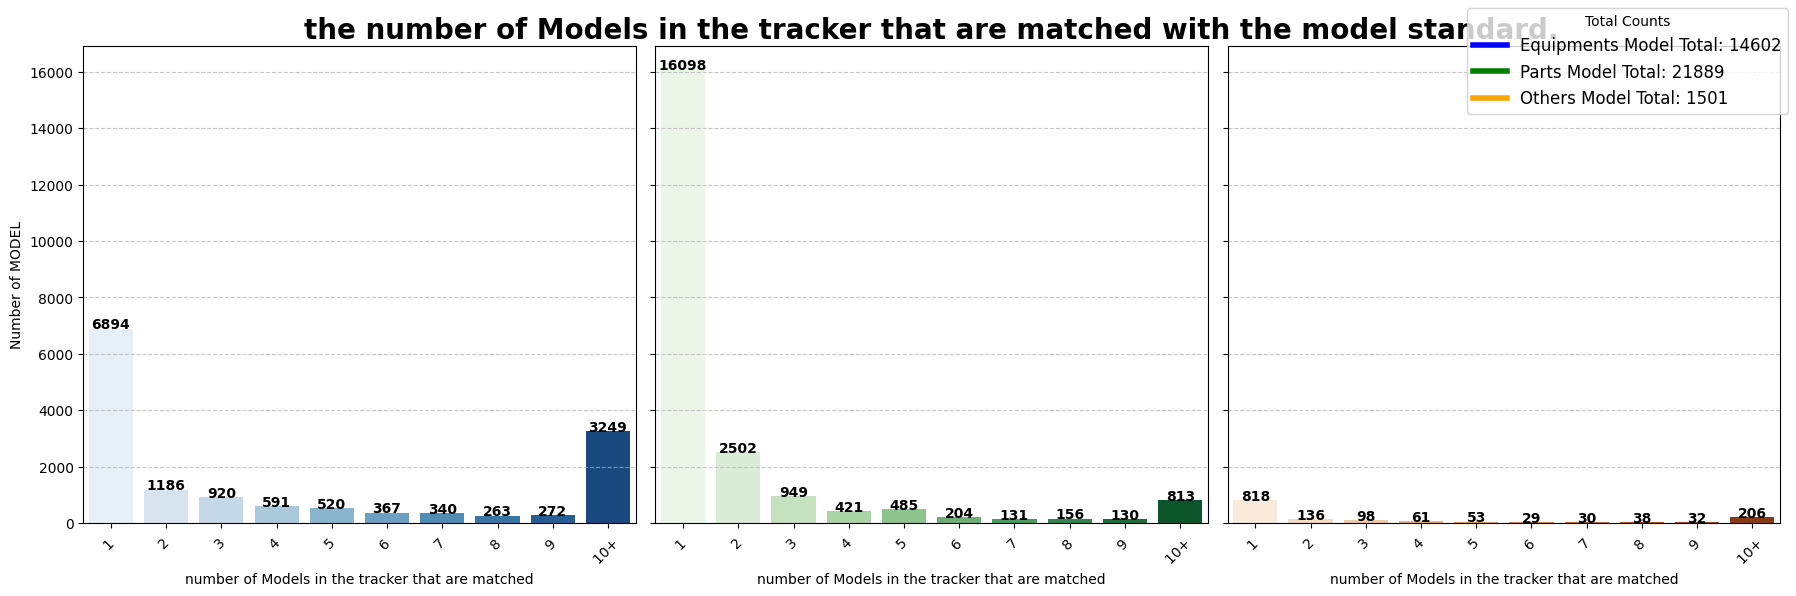

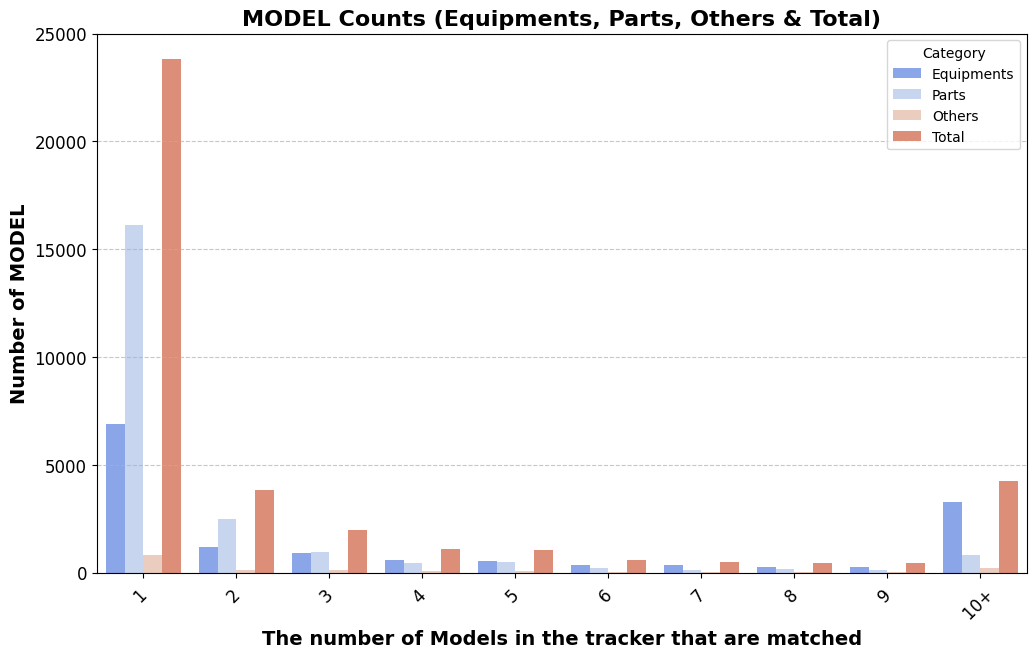

In [21]:
# Prevent negative sign issues
plt.rcParams["axes.unicode_minus"] = False

# Define function to filter and compute bin counts
def get_bin_counts(tracker_info, category_list, category_name):
    filtered_df = tracker_info[tracker_info["Category_Name"].isin(category_list)]
    filtered_df = filtered_df[filtered_df["STD_MODEL_YN"] == "Y"]

    model_counts = filtered_df["MODEL_ID"].value_counts()

    # Define bins (1 to 10 occurrences, and 10+ occurrences)
    max_count = model_counts.max()
    bins = list(range(1, 11))  # 1~10ÍπåÏßÄ Í∏∞Î≥∏ bin
    if max_count > 10:
        bins.append(max_count)  # 10Í∞ú Ïù¥ÏÉÅ Íµ¨Î∂ÑÏùÑ ÏúÑÌï¥ Ï∂îÍ∞Ä

    bin_labels = [f"{i} " for i in range(1, 10)] + ["10+ "]

    # Ensure bins are strictly increasing
    bins = sorted(set(bins))  

    # Assign each count to a bin
    bin_indices = np.digitize(model_counts, bins, right=True) - 1
    bin_indices = np.clip(bin_indices, 0, len(bin_labels) - 1)  # Ensure no negative values

    # Count the number of MODEL_IDs in each bin
    bin_counts = np.bincount(bin_indices, minlength=len(bin_labels))

    return pd.DataFrame({"Category": category_name, "Bin": bin_labels, "Count": bin_counts})

# Compute bin counts for each category
df_equipments = get_bin_counts(tracker_info, equipment_category, "Equipments")
df_parts = get_bin_counts(tracker_info, parts_category, "Parts")
df_others = get_bin_counts(tracker_info, others_category, "Others")

# Compute total count for legend
equipments_total = df_equipments["Count"].sum()
parts_total = df_parts["Count"].sum()
others_total = df_others["Count"].sum()

# üé® Individual plots with count labels
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot for Equipments
sns.barplot(data=df_equipments, x="Bin", y="Count", hue="Bin", palette="Blues", legend=False, ax=axes[0])
axes[0].set_title("", fontsize=20, fontweight="bold")
for i, row in df_equipments.iterrows():
    axes[0].text(i, row["Count"] + 1, str(row["Count"]), ha="center", fontsize=10, fontweight="bold")

# Plot for Parts
sns.barplot(data=df_parts, x="Bin", y="Count", hue="Bin", palette="Greens", legend=False, ax=axes[1])
axes[1].set_title("the number of Models in the tracker that are matched with the model standard.", fontsize=20, fontweight="bold")
for i, row in df_parts.iterrows():
    axes[1].text(i, row["Count"] + 1, str(row["Count"]), ha="center", fontsize=10, fontweight="bold")

# Plot for Others
sns.barplot(data=df_others, x="Bin", y="Count", hue="Bin", palette="Oranges", legend=False, ax=axes[2])
axes[2].set_title("", fontsize=20, fontweight="bold")
for i, row in df_others.iterrows():
    axes[2].text(i, row["Count"] + 1, str(row["Count"]), ha="center", fontsize=10, fontweight="bold")

for ax in axes:
    ax.set_xticks(range(len(df_equipments["Bin"])))  # Fix ticks first
    ax.set_xticklabels(df_equipments["Bin"], rotation=45)
    ax.set_xlabel("number of Models in the tracker that are matched")
    ax.set_ylabel("Number of MODEL")
    ax.grid(axis="y", linestyle="--", alpha=0.7)

# üé® Î≤îÎ°Ä Ï∂îÍ∞Ä (Í∞Å Ïπ¥ÌÖåÍ≥†Î¶¨ Ï¥ùÌï©)
handles = [
    plt.Line2D([0], [0], color="blue", lw=4, label=f"Equipments Model Total: {equipments_total}"),
    plt.Line2D([0], [0], color="green", lw=4, label=f"Parts Model Total: {parts_total}"),
    plt.Line2D([0], [0], color="orange", lw=4, label=f"Others Model Total: {others_total}"),
]
fig.legend(handles=handles, loc="upper right", fontsize=12, title="Total Counts")

plt.tight_layout()
plt.show()

df_total = pd.concat([df_equipments, df_parts, df_others])
df_total_grouped = df_total.groupby("Bin", as_index=False)["Count"].sum()
df_total_grouped["Category"] = "Total"

# Combine all for final visualization
df_final = pd.concat([df_total, df_total_grouped])

# üé® Combined plot with hue and count labels
plt.figure(figsize=(12, 7))
ax = sns.barplot(data=df_final, x="Bin", y="Count", hue="Category", palette="coolwarm")

# for i, row in df_final.iterrows():
#     ax.text(i % len(df_final["Bin"].unique()), row["Count"] + 1, str(row["Count"]), ha="center", fontsize=10, fontweight="bold")

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("The number of Models in the tracker that are matched", fontsize=14, fontweight="bold")
plt.ylabel("Number of MODEL", fontsize=14, fontweight="bold")
plt.title("MODEL Counts (Equipments, Parts, Others & Total)", fontsize=16, fontweight="bold")
plt.legend(title="Category")
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Add horizontal grid lines

plt.show()


- trackerÏóêÏÑú Ïû•ÎπÑ modelÍ≥º Îß§Ïπ≠ÎêòÎäî Í∞úÏàò : 14,602 standard model Ïû•ÎπÑÏùò Í∞úÏàò : 17,383
- trackerÏóêÏÑú Î∂ÄÌíà modelÍ≥º Îß§Ïπ≠ÎêòÎäî Í∞úÏàò : 21,889 standard model Î∂ÄÌíàÏùò Í∞úÏàò : 366,470
- trackerÏóêÏÑú others modelÍ≥º Îß§Ïπ≠ÎêòÎäî Í∞úÏàò : 1,501 standard model othersÏùò Í∞úÏàò : 1,744

### Unknown Ï≤òÎ¶¨
Ïä§ÌÉ†Îã§ÎìúÎ™®Îç∏ÏûÑÏóêÎèÑ Î∂àÍµ¨ÌïòÍ≥† unknown Îç∞Ïù¥ÌÑ∞Í∞Ä 544Í∞úÎ°ú ÏÉÅÎãπÏàò ÏûàÏóàÏùå. Î∂àÌïÑÏöîÌïòÎã§Í≥† ÌåêÎã®ÎêòÏñ¥ ÏÇ≠Ï†ú Ìï†ÏòàÏ†ï

In [22]:
(equipments_model_df.applymap(lambda x: str(x).lower() == "unknown")).sum()

/tmp/ipykernel_424891/2293076022.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  (equipments_model_df.applymap(lambda x: str(x).lower() == "unknown")).sum()


modelID           0
modelSTDName    393
MakerID           0
modelAlias      151
category          0
new_alias         0
dtype: int64

In [23]:
(model_df.applymap(lambda x: str(x).lower() == "unknwon")).sum()

/tmp/ipykernel_424891/1355170193.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  (model_df.applymap(lambda x: str(x).lower() == "unknwon")).sum()


modelID         0
modelSTDName    1
MakerID         0
modelAlias      0
category        0
new_alias       0
dtype: int64

In [24]:
(model_df.applymap(lambda x: str(x).lower() == "unkown")).sum()

/tmp/ipykernel_424891/1867060125.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  (model_df.applymap(lambda x: str(x).lower() == "unkown")).sum()


modelID         0
modelSTDName    1
MakerID         0
modelAlias      1
category        0
new_alias       0
dtype: int64

In [25]:
(model_df.applymap(lambda x: str(x).lower() == "unkonwn")).sum()

/tmp/ipykernel_424891/2247001806.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  (model_df.applymap(lambda x: str(x).lower() == "unkonwn")).sum()


modelID         0
modelSTDName    1
MakerID         0
modelAlias      1
category        0
new_alias       0
dtype: int64

In [26]:
client = MilvusClient("../DB/milvus.db")

In [27]:
equipments_model_df

modelID    modelSTDName   MakerID  \
4       MO886711       CUWLS-080  MA252842   
8       MO345734   OS-OVN11-CL05    MA2817   
9       MO299924  OS-OVN11-CL01W    MA2817   
10      MO333933    OS-OVN11-C02    MA2817   
11      MO886710       CURWA-530  MA252842   
...          ...             ...       ...   
385608    MO6090         DMC200A    MA2737   
385609    MO5986      NEWVIEW600    MA2608   
385610    MO6690       TCT-62LMV     MA622   
385611     MO954         FAD2200    MA1487   
385612     MO955         FAD2300    MA1487   

                                               modelAlias category  \
4                                               CUWLS-080  PKG ETC   
8                                           OS-OVN11-CL05  PKG ETC   
9       OS OVN11CL01W,OS_OVN11CL01W,OSOVN11CL01W,OS-OV...  PKG ETC   
10                                           OS-OVN11-C02  PKG ETC   
11                                              CURWA-530  PKG ETC   
...                                                   ...      ...   
385608                                            DMC200A  PKG ETC   
385609                                         NEWVIEW600  PKG ETC   
385610                                          TCT-62LMV  PKG ETC   
385611                                            FAD2200  PKG ETC   
385612                                            FAD2300  PKG ETC   

                                                new_alias  
4                                             [CUWLS-080]  
8                                         [OS-OVN11-CL05]  
9       [OS OVN11CL01W, OS_OVN11CL01W, OSOVN11CL01W, O...  
10                                         [OS-OVN11-C02]  
11                                            [CURWA-530]  
...                                                   ...  
385608                                          [DMC200A]  
385609                                       [NEWVIEW600]  
385610                                        [TCT-62LMV]  
385611                                          [FAD2200]  
385612                                          [FAD2300]  

[17143 rows x 6 columns]

### BM25ÎûÄ?

**BM25**Îäî **Í≤ÄÏÉâ ÏóîÏßÑÏóêÏÑú Î¨∏ÏÑúÎ•º ÏàúÏúÑÌôîÌïòÎäî ÏïåÍ≥†Î¶¨Ï¶ò**ÏûÑ.  
ÏâΩÍ≤å ÎßêÌïòÎ©¥, **ÏÇ¨Ïö©ÏûêÍ∞Ä ÏûÖÎ†•Ìïú Í≤ÄÏÉâÏñ¥ÏôÄ Í∞ÄÏû• Í¥ÄÎ†®ÏÑ±Ïù¥ ÎÜíÏùÄ Î¨∏ÏÑúÎ•º Ï∞æÎäî Î∞©Î≤ï**ÏûÑ.



### BM25Ïùò ÌïµÏã¨ Í∞úÎÖê

1. **Îã®Ïñ¥Í∞Ä ÎßéÏù¥ ÎÇòÏò§Î©¥ Ï§ëÏöîÌï®!**  
   - Í≤ÄÏÉâÏñ¥(ÌÇ§ÏõåÎìú)Í∞Ä Î¨∏ÏÑúÏóêÏÑú Ïó¨Îü¨ Î≤à ÎÇòÏò§Î©¥, Í∑∏ Î¨∏ÏÑúÎäî Í≤ÄÏÉâÏñ¥ÏôÄ Îçî Í¥ÄÎ†®Ïù¥ ÏûàÎã§Í≥† ÌåêÎã®Ìï®.

2. **ÎÑàÎ¨¥ ÎßéÏù¥ ÎÇòÏò§Î©¥ Ïò§ÌûàÎ†§ Îçú Ï§ëÏöîÌï¥Ïßê!**  
   - ÏòàÎ•º Îì§Ïñ¥, "Ï∂ïÍµ¨"ÎùºÎäî Îã®Ïñ¥Í∞Ä 100Î≤à ÎÇòÏôîÎã§Í≥† Ìï¥ÏÑú Î¨¥Ï°∞Í±¥ Ï§ëÏöîÌïú Í≤ÉÏùÄ ÏïÑÎãò.  
   - ÌäπÏ†ï Îã®Ïñ¥Í∞Ä ÎÑàÎ¨¥ ÏûêÏ£º Îì±Ïû•ÌïòÎ©¥ **Ï§ëÎ≥µÎêú Ï†ïÎ≥¥Ïùº Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏúºÎØÄÎ°ú Í∞ÄÏ§ëÏπòÎ•º ÎÇÆÏ∂§**.

3. **ÏßßÏùÄ Î¨∏ÏÑúÏùºÏàòÎ°ù Í≤ÄÏÉâÏñ¥Í∞Ä Îçî Ï§ëÏöîÌï®!**  
   - ÏòàÎ•º Îì§Ïñ¥, **"Ï∂ïÍµ¨ÎûÄ?"** Ïù¥ÎùºÎäî ÏßßÏùÄ Î¨∏ÏÑúÏóêÏÑú "Ï∂ïÍµ¨"Í∞Ä 3Î≤à ÎÇòÏò§Î©¥ ÍµâÏû•Ìûà Ï§ëÏöîÌïú Îã®Ïñ¥ÏûÑ.  
   - Î∞òÎ©¥, **"Ï∂ïÍµ¨ Ïó≠ÏÇ¨ Î∞è Í∑úÏπôÏóê ÎåÄÌïú ÎÖºÎ¨∏"** Í∞ôÏùÄ Í∏¥ Î¨∏ÏÑúÏóêÏÑú 3Î≤à ÎÇòÏôîÎã§Î©¥ Îçú Ï§ëÏöîÌï† ÏàòÎèÑ ÏûàÏùå.



### BM25Îäî Ïñ¥ÎîîÏóê Ïì∞ÏùºÍπå?

-  **Íµ¨Í∏Ä Í≤ÄÏÉâ ÏóîÏßÑ** ‚Üí ÏÇ¨Ïö©ÏûêÍ∞Ä ÏûÖÎ†•Ìïú Í≤ÄÏÉâÏñ¥ÏôÄ Í¥ÄÎ†®Îêú Ïõπ ÌéòÏù¥ÏßÄ Ï∞æÍ∏∞  
-  **Ï†ÑÏûêÏÉÅÍ±∞Îûò (Ïòà: Ïø†Ìå°, ÏïÑÎßàÏ°¥)** ‚Üí Í≥†Í∞ùÏù¥ ÏõêÌïòÎäî ÏÉÅÌíàÏùÑ Îπ†Î•¥Í≤å Ï∂îÏ≤ú 
-  **Ï±óÎ¥á & AI** ‚Üí ÏÇ¨Ïö©ÏûêÍ∞Ä ÏûÖÎ†•Ìïú ÏßàÎ¨∏Í≥º Í∞ÄÏû• Í¥ÄÎ†® ÏûàÎäî Î¨∏ÏÑúÎ•º Ï∞æÏïÑ ÎãµÎ≥Ä Ï†úÍ≥µ 



### Í≤∞Î°†

BM25Îäî **Í≤ÄÏÉâÏñ¥ÏôÄ Î¨∏ÏÑúÏùò Í¥ÄÎ†®ÏÑ±ÏùÑ Î∂ÑÏÑùÌïòÏó¨ ÏàúÏúÑÎ•º Îß§Í∏∞Îäî ÏïåÍ≥†Î¶¨Ï¶ò**ÏûÑ.  
Ï¶â, **"Ïù¥ Î¨∏ÏÑúÍ∞Ä Í≤ÄÏÉâÏñ¥ÏôÄ ÏñºÎßàÎÇò Ïûò ÎßûÎäîÏßÄ?"** Î•º ÌåêÎã®ÌïòÎäî Î∞©Î≤ïÏù¥ÎùºÍ≥† ÏÉùÍ∞ÅÌïòÎ©¥ Îê®! üòä


# Text Search

In [28]:
equipments = set()

for _, row in equipments_model_df.iterrows():
    # modelSTDName, modelAliasÏóêÏÑú "Unknown" Ï≤òÎ¶¨
    model_std_name = str(row["modelSTDName"]) if row["modelSTDName"] is not None else ""
    model_alias = str(row["modelAlias"]) if row["modelAlias"] is not None else ""

    # "Unknown"Îßå ÏûàÎäî Í≤ΩÏö∞ NoneÏúºÎ°ú Î≥ÄÍ≤Ω, Í∑∏Î†áÏßÄ ÏïäÏúºÎ©¥ "Unknown" ÏÇ≠Ï†ú
    model_std_name = None if model_std_name.lower().strip() == "unknown" else model_std_name.replace("Unknown", "").strip()
    model_alias = None if model_alias.lower().strip() == "unknown" else model_alias.replace("Unknown", "").strip()

    # model_alias Í∏∏Ïù¥Î•º 450ÏûêÎ°ú Ï†úÌïú
    if model_alias:
        model_alias = model_alias[:460]

    # Í∞Å Ìñâ(row)Ïùò Îç∞Ïù¥ÌÑ∞Î•º ÌäúÌîåÎ°ú Ï†ÄÏû•
    equipment_tuple = (
        row["modelID"],
        model_std_name,
        row["MakerID"],
        model_alias,
        row["category"]
    )

    # ÌäúÌîåÏùÑ equipmentsÏóê Ï∂îÍ∞Ä
    equipments.add(equipment_tuple)

# ÌäúÌîåÏùÑ Î¨∏ÏûêÏó¥Î°ú Î≥ÄÌôò (Í∏∏Ïù¥ Ï†úÌïú X)
docs = [" ".join(map(str, doc)) for doc in equipments]


In [31]:
docs

['MO86383 COSMO-BGA8-40 MA173 COSMO-BGA8-40 PKG ETC',
 'MO1326 KY3030 MA1134 KOH YOUNG 3030 OU 8030,KY3030 Inspection',
 'MO258762 TG70A6 MA2024 TG70A6 ATE ETC',
 'MO5884 Feeder MA000 Feeder,Feeder (587EA),Shelf Gravity Feeder,Shelf Gravity Feeder Racks SMT ETC',
 'MO181230 RF25M MA1855 RF 25M,RF25M Fab Others',
 'MO318224 SAO-200LP MA2506 SAO-200LP,SAO-200LP-WMIXXXX,SRTF200-LP RTP',
 'MO72791 RTI-480 MA432 RTI-480 ATE ETC',
 'MO48809 Epoxy Controller MA1487 EPOXY CONTROLLER PKG ETC',
 'MO273995 KHJ-MC18C-00 MA1691 KHJ-MC18C-00 SMT ETC',
 'MO228652 MTPEB MA60 MTPEB Fab Others',
 'MO331856 PWG MA261097 PWG,WaferSight PWG Metrology',
 'MO5481 NV-8200P MA225 NV8200,NV8200P,NV-8200P Implant',
 'MO6864 16T-1007 MA785 16T-1007 WET',
 'MO2572 Terascan 586 MA261097 Terascan 586,Terascan586 Metrology',
 'MO272934 NSR-1755G5A MA1561 NSR-1755G5A,Stepper NSR-1755G5A 220(HFS),Stepper NSR-1755G5A213,Stepper NSR-1755G5A219 Stepper',
 'MO289311 AME2000 MA261179 AME2000 ATE ETC',
 'MO273299 GP-1503DU M

In [29]:
# varcharÎ•º 512Î°ú ÏßÑÌñâÌñàÎäîÎç∞ Î¨∏Ïû•Ïùò Í∏∏Ïù¥Í∞Ä ÏóÑÏ≤≠Í∏¥ Í≤ÉÎì§Ïù¥ ÏûàÎã§.
# ÏûêÎ¶¨Î∞îÎÄåÎäî Ï†ïÎèÑÏùò Î≥ÄÍ≤ΩÏù¥Ïñ¥ÏÑú 512Î°ú ÏûòÎùºÎÇ¥Ïñ¥ÎèÑ Ï∂©Î∂ÑÌï†Í≤ÉÏúºÎ°ú Î≥¥Ïù∏Îã§.
for i, text in enumerate(docs):
    if 512<len(text):
        print(f"üîπ {i+1}Î≤àÏß∏ Î¨∏Ïû• Í∏∏Ïù¥: {len(text)}")
        print(docs[i])

In [30]:
from milvus_model.hybrid import BGEM3EmbeddingFunction

ef = BGEM3EmbeddingFunction(use_fp16=False, device="cuda")
dense_dim = ef.dim["dense"]

# Generate embeddings using BGE-M3 model
docs_embeddings = ef(docs)

/workspace/Large_languige_model/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
pre tokenize: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1072/1072 [00:00<00:00, 3252.62it/s]
You're using a XLMRobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
Inference Embeddings: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1072/1072 [00:12<00:00, 86.75it/s] 


- return Î∞ÄÏßëÎ∞±ÌÑ∞, sparse 2Í∞ÄÏßÄ Î∞±ÌÑ∞Î•º Î±âÏñ¥ÎÉÑ
- Î∞ÄÏßë(Dense) Î≤°ÌÑ∞	Î™®Îì† Ï∞®ÏõêÏóê Í∞íÏù¥ ÏûàÎäî Î≤°ÌÑ∞	[0.1, 0.2, 0.3, ..., 0.5]
- Ìù¨ÏÜå(Sparse) Î≤°ÌÑ∞	ÎåÄÎ∂ÄÎ∂Ñ 0Ïù¥Í≥†, Ï§ëÏöîÌïú Í∞íÎßå Ï†ÄÏû•	{(10, 0.4), (500, 0.8), (2000, 0.3)}

In [26]:
from pymilvus import (
    connections,
    utility,
    FieldSchema,
    CollectionSchema,
    DataType,
    Collection,
)

connections.connect(uri="./milvus.db")

fields = [
    # Use auto generated id as primary key
    FieldSchema(
        name="pk", dtype=DataType.VARCHAR, is_primary=True, auto_id=True, max_length=100
    ),
    # Store the original text to retrieve based on semantically distance
    FieldSchema(name="text", dtype=DataType.VARCHAR, max_length=512),
    # Milvus now supports both sparse and dense vectors,
    # we can store each in a separate field to conduct hybrid search on both vectors
    FieldSchema(name="sparse_vector", dtype=DataType.SPARSE_FLOAT_VECTOR),
    FieldSchema(name="dense_vector", dtype=DataType.FLOAT_VECTOR, dim=dense_dim),
]
schema = CollectionSchema(fields)

col_name = "stardard_model"
if utility.has_collection(col_name):
    Collection(col_name).drop()
col = Collection(col_name, schema, consistency_level="Strong")

sparse_index = {"index_type": "SPARSE_INVERTED_INDEX", "metric_type": "IP"}
col.create_index("sparse_vector", sparse_index)
dense_index = {"index_type": "AUTOINDEX", "metric_type": "IP"}
col.create_index("dense_vector", dense_index)
col.load()


- Sparse vector
input (G4)
- MO252 AIX 2800G4 HT MA78 2800 G4HT,2800G4-HT 6x6",2800G4-HT parts,AIX 2800G4 HT,AIX2800 G4 HT,AIX2800 G4HT,AIX2800G4HT,G4 2800HT MoCVD',
- "G4"	‚úÖ Í∞ÄÎä•	"AIX 2800G4 HT"ÏóêÏÑú Î∂ÑÎ¶¨Îêú Í≤ΩÏö∞ Í≤ÄÏÉâ Í∞ÄÎä•
- "G4HT"	‚ö†Ô∏è Î∂ÄÎ∂Ñ Í∞ÄÎä•	"G4HT"Í∞Ä ÌïòÎÇòÏùò Îã®Ïñ¥Î°ú Ïù∏ÏãùÎêòÎ©¥ Í≤ÄÏÉâ Ïñ¥Î†§ÏõÄ
- "2800G4HT"	‚ùå Ïñ¥Î†§ÏõÄ	"2800G4HT"Í∞Ä ÌïòÎÇòÏùò Îã®Ïñ¥Î°ú Ï≤òÎ¶¨ÎêòÎ©¥ Í≤ÄÏÉâÎêòÏßÄ ÏïäÏùÑ Í∞ÄÎä•ÏÑ±Ïù¥ ÌÅº
- "AIX"	‚úÖ Í∞ÄÎä•	TF-IDF/BM25ÏóêÏÑú ÎÜíÏùÄ Ï§ëÏöîÎèÑÎ•º Í∞ÄÏßà Í∞ÄÎä•ÏÑ±Ïù¥ ÌÅº
- "2800G4"	‚ö†Ô∏è Î∂ÄÎ∂Ñ Í∞ÄÎä•	"2800G4 HT"Ï≤òÎüº Î∂ÑÎ¶¨Îêú Í≤ΩÏö∞ Í≤ÄÏÉâ Í∞ÄÎä•, Ïïà Î∂ÑÎ¶¨ÎêòÎ©¥ Í≤ÄÏÉâ Ïñ¥Î†§ÏõÄ

In [27]:
for i in range(0, len(docs), 50):
    batched_entities = [
        docs[i : i + 50],
        docs_embeddings["sparse"][i : i + 50],
        docs_embeddings["dense"][i : i + 50],
    ]
    col.insert(batched_entities)
print("Number of entities inserted:", col.num_entities)


Number of entities inserted: 17383


# search Define

In [28]:
from pymilvus import (
    AnnSearchRequest,
    WeightedRanker,
)


def dense_search(col, query_dense_embedding, limit=5, cutoff=0.1):
    search_params = {"metric_type": "IP", "params": {}}
    res = col.search(
        [query_dense_embedding],
        anns_field="dense_vector",
        limit=limit,
        output_fields=["text"],
        param=search_params,
    )[0]
    return [hit.get("text") for hit in res if hit.distance >= cutoff]


def sparse_search(col, query_sparse_embedding, limit=5, cutoff=0.1):
    search_params = {
        "metric_type": "IP",
        "params": {},
    }
    res = col.search(
        [query_sparse_embedding],
        anns_field="sparse_vector",
        limit=limit,
        output_fields=["text"],
        param=search_params,
    )[0]
    return [hit.get("text") for hit in res if hit.distance >= cutoff]


def hybrid_search(
    col,
    query_dense_embedding,
    query_sparse_embedding,
    sparse_weight=1.0,
    dense_weight=1.0,
    limit=5,
    cutoff=0.1
):
    dense_search_params = {"metric_type": "IP", "params": {}}
    dense_req = AnnSearchRequest(
        [query_dense_embedding], "dense_vector", dense_search_params, limit=limit
    )
    sparse_search_params = {"metric_type": "IP", "params": {}}
    sparse_req = AnnSearchRequest(
        [query_sparse_embedding], "sparse_vector", sparse_search_params, limit=limit
    )
    rerank = WeightedRanker(sparse_weight, dense_weight)
    res = col.hybrid_search(
        [sparse_req, dense_req], rerank=rerank, limit=limit, output_fields=["text"]
    )[0]
    return [hit.get("text") for hit in res if hit.distance >= cutoff]

# ÏãúÌóòÌÖåÏä§Ìä∏

In [29]:
# Enter your search query
query = input("Enter your search query: ")
print(query)

# Generate embeddings for the query
query_embeddings = ef([query])
# print(query_embeddings)

aix


In [30]:
dense_results = dense_search(col, query_embeddings["dense"][0])
sparse_results = sparse_search(col, query_embeddings["sparse"][[0]])
hybrid_results = hybrid_search(
    col,
    query_embeddings["dense"][0],
    query_embeddings["sparse"][[0]],
    sparse_weight=0.7,
    dense_weight=1.0,
)

In [31]:
unknown_df = tracker_info[
    (tracker_info["STD_MODEL_YN"] == "Y") & (tracker_info["Category_Name"] == "Fab Others")
]
unknown_df.iloc[10:]

Category_Code Category_Name  MAKER_ID  MAKER_NAME  MODEL_ID  \
7406       COMPONENT    Fab Others    MA1561       Nikon    MO8808   
7412       COMPONENT    Fab Others   MA18089       Asyst    MO1369   
8005       COMPONENT    Fab Others    MA2088        SSEC  MO178099   
8147       COMPONENT    Fab Others     MA729    Fortrend  MO373685   
9541       COMPONENT    Fab Others     MA667    EV GROUP     MO932   
...              ...           ...       ...         ...       ...   
669301     COMPONENT    Fab Others    MA1446         MKS  MO241300   
669402     COMPONENT    Fab Others    MA1446         MKS  MO241300   
672820     COMPONENT    Fab Others    MA2729      DAIHEN   MO37129   
674285     COMPONENT    Fab Others  MA272815  WTC binder  MO343855   
674307     COMPONENT    Fab Others    MA1919      Sankyo  MO117726   

        MODEL_NAME              Process_NM  \
7406       Unknown       Remote controller   
7412       LPT2200                       Ôºç   
8005          3302       high water washer   
8147    LAMINA 203                     NaN   
9541        EVG640            Mask Aligner   
...            ...                     ...   
669301        Part  MKS parts for the ASP+   
669402        Part    [Part]MKS parts 2set   
672820      CMC-10                     NaN   
674285       78532                    Etch   
674307       SWH80                     NaN   

                                            Configuration SERIAL_NO VINTAGE  \
7406    Module : Photo Tool Deconed(O)Tool Deinstalled...       NaN     NaN   
7412                                                    Ôºç         „Éº     NaN   
8005    Handle idle (production machine) Support 12 in...       NaN     NaN   
8147                                                  NaN       NaN     NaN   
9541                                                  NaN       NaN     NaN   
...                                                   ...       ...     ...   
669301                                                NaN       NaN     NaN   
669402                    Auto Match, Magnetron,ÎèÑÌååÍ¥Ä,Etc.,      EB85    1999   
672820  Qty : 3 / Title : DAIHEN CMC-10 AUTO TUNE CONT...       NaN     NaN   
674285                                                NaN    990063    2000   
674307                                                NaN       NaN     NaN   

        ...                                         Seller  \
7406    ...                             GES Associates LLC   
7412    ...  Sumitomo Mitsui Finance and Leasing Co., Ltd.   
8005    ...            Siliconware Precision Ind. Co. Ltd.   
8147    ...                              Intel Corporation   
9541    ...                 Macquarie Electronics USA Inc.   
...     ...                                            ...   
669301  ...                                         Pascal   
669402  ...                            SurplusGLOBAL, Inc.   
672820  ...                  Capitol Area Technology, LLC.   
674285  ...                      GLOBALFOUNDRIES U.S. Inc.   
674307  ...                            E-Tech Solution Inc   

                                                    Owner USER_FAB_ID  \
7406    Texas Instruments Semiconductor Manufacturing ...         NaN   
7412           Sony Semiconductor Manufacturing Co., Ltd.         NaN   
8005                  Siliconware Precision Ind. Co. Ltd.         NaN   
8147                                    Intel Corporation         NaN   
9541                                           Qorvo, Inc         NaN   
...                                                   ...         ...   
669301                                SurplusGLOBAL, Inc.         NaN   
669402                                SurplusGLOBAL, Inc.         NaN   
672820                      Capitol Area Technology, LLC.         NaN   
674285                          GLOBALFOUNDRIES U.S. Inc.         NaN   
674307                                E-Tech Solution Inc         NaN   

       COUNTRY_CD P&C      COD

In [32]:
equipments_tracker_df=tracker_info[tracker_info['Category_Name'].isin(equipment_category)]
equipments_tracker_df

Category_Code     Category_Name MAKER_ID MAKER_NAME MODEL_ID  \
1       REFLOW_SOLDERING  Reflow&Soldering    MA752   Furukawa   MO6845   
3           CHIP_MOUNTER      Chip Mounter    MA740       Fuji    MO588   
4             DICING_SAW        Dicing Saw    MA522      Disco    MO719   
105          WIRE_BONDER       Wire Bonder    MA179        ASM    MO430   
206          WIRE_BONDER       Wire Bonder    MA179        ASM    MO430   
...                  ...               ...      ...        ...      ...   
674632               PVD               PVD    MA110       AMAT    MO869   
674633               PVD               PVD    MA110       AMAT    MO869   
674634               PVD               PVD    MA110       AMAT    MO869   
674635               PVD               PVD    MA110       AMAT    MO869   
674643      BACK_GRINDER      Back Grinder     MA13  Accretech   MO1930   

          MODEL_NAME    Process_NM  \
1       XNIII-725PCG  Reflow oven_   
3            CP-842E  Chip mounter   
4             DFD640     Wafer Saw   
105          Eagle60   Wire Bonder   
206          Eagle60   Wire Bonder   
...              ...           ...   
674632      Endura 2         METAL   
674633      Endura 2           NaN   
674634      Endura 2           NaN   
674635      Endura 2           NaN   
674643         PG200  Back Grinder   

                                            Configuration SERIAL_NO VINTAGE  \
1                                                     NaN    X04597    2000   
3                                                     NaN       538    2004   
4                                  Including CSP Function    EL1403    1996   
105                                                   NaN  E649-028    2008   
206                                                   NaN  E626-031    2005   
...                                                   ...       ...     ...   
674632  OEM: AMAT  Tool Model: Endura2  Software Versi...       NaN    2004   
674633  OEM: AMAT  Tool Model: Endura2  Software Versi...       NaN     NaN   
674634                                                NaN       NaN     NaN   
674635                                                NaN       NaN     NaN   
674643             Vacuum Pump, Chiller, Air Dryer, PG200  P03001BY    2004   

        ...                                 Seller  \
1       ...                    JINUTEC CORPORATION   
3       ...                                    DHC   
4       ...                               SEMI RUN   
105     ...                     ENERCORE CO., LTD.   
206     ...                     ENERCORE CO., LTD.   
...     ...                                    ...   
674632  ...  Macquarie Asset Finance Japan Limited   
674633  ...  Macquarie Asset Finance Japan Limited   
674634  ...  Macquarie Asset Finance Japan Limited   
674635  ...  Macquarie Asset Finance Japan Limited   
674643  ...                    SurplusGLOBAL, Inc.   

                                 Owner USER_FAB_ID COUNTRY_CD P&C    CODE  \
1                  JINUTEC CORPORATION         NaN        NaN   N     NaN   
3                                  DHC         NaN        NaN   N     NaN   
4                             SEMI RUN         NaN         KR   N     NaN   
105                 ENERCORE CO., LTD.         NaN         KR   N     NaN   
206                 ENERCORE CO., LTD.         NaN         KR   N     NaN   
...                                ...         ...        ...  ..     ...   
674632  Micron Memory Taiwan Co., Ltd.         NaN         TW   N     NaN   
674633  Micron Memory Taiwan Co., Ltd.         NaN         TW   N  216821   
674634  Micron Memory Taiwan Co., Ltd.         NaN         TW   N  220939   
674635  Micron Technology Taiwan, Inc.         NaN         TW   N  220938   
674643                            INTS         NaN         KR   N     NaN   

       STD_MODEL_YN STD_MAKER_YN Process(model Info)  \
1                 Y            Y                 NaN   
3                 

In [ ]:
from tqdm import tqdm
i = 0


for eq_name, eq_id in tqdm(equipments_tracker_df[equipments_tracker_df["STD_MODEL_YN"] == "Y"][["MODEL_NAME", "MODEL_ID"]].values[:2000]):
    try:
        # eq_nameÏù¥ intÏù∏ Í≤ΩÏö∞ Í∞êÏßÄ & Ïò§Î•ò Ï∂úÎ†•
        if isinstance(eq_name, int):
            raise ValueError(f"‚ö† Ïò§Î•ò: MODEL_NAME({eq_name})Ïù¥ int ÌÉÄÏûÖÏûÖÎãàÎã§!")

        eq_name = str(eq_name)  # Î¨∏ÏûêÏó¥Î°ú Î≥ÄÌôò
        #print(eq_name, eq_id)

        # Í≤ÄÏÉâ ÏàòÌñâ
        query_embeddings = ef([eq_name])
        sparse_results = dense_search(col, query_embeddings["dense"][0])
        #print(sparse_results)

        # Í≤∞Í≥º Î∂ÑÏÑù
        keyword = sparse_results[0].split(" ")[0] if sparse_results else None
        #print(keyword)
        if keyword == eq_id:
            i += 1
        else:
            print(f"üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: {eq_name}, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: {eq_id}, searchÍ∞Ä Ï∞æÏùÄ Í∞í: {keyword}")

    except ValueError as e:
        print(f"‚ùå {e}")  # `eq_name`Ïù¥ intÏòÄÏùÑ Îïå Ïò§Î•ò Î©îÏãúÏßÄ Ï∂úÎ†•
    except Exception:
        print(f"‚ùå standard model Î™ªÏ∞æÏùå: {eq_name}, {eq_id}")
        

print(f"‚úÖ ÏùºÏπòÌïòÎäî Î™®Îç∏ Ïàò: {i}")


  1%|          | 12/1000 [00:00<00:27, 35.50it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: iHawk, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1162, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO1163


  3%|‚ñé         | 28/1000 [00:00<00:26, 36.20it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Unknown, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO15308, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Unknown, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO15308, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Unknown, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO15308, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: MarkVz, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1484, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: FPA-3000i5, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1013, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO1014


  4%|‚ñç         | 44/1000 [00:01<00:25, 36.79it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: P5000, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1818, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO1845
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: KLA5200XP, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1309, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO482
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: KLA5200XP, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1309, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO482


  5%|‚ñå         | 52/1000 [00:01<00:25, 36.84it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: FPA-2500i3, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1005, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO1004
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: TP-500, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2596, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO340174
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: OP-2690, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1774, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO24701


  6%|‚ñå         | 60/1000 [00:01<00:25, 36.64it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: 7830i, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO255604, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO23465
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: SS-W80A-A, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2404, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO2405
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: SS-W80A-A, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2404, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO2405
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: SS-W80A-A, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2404, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO2405
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: MetaPULSE, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO855, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO5323


  7%|‚ñã         | 68/1000 [00:01<00:26, 35.83it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: NSR-2005G8C, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1664, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO1669
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: NSR-2005G8C, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1664, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO1669
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: MPA-600FA, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1527, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO1528


  8%|‚ñä         | 80/1000 [00:02<00:25, 35.52it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: SC-W60A-AVG, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO327168, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO286442
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: 80B, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO6586, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO286450


  9%|‚ñâ         | 88/1000 [00:02<00:25, 35.44it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: MarkVz, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1484, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: MarkVz, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1484, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: MarkVz, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1484, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: IW-6D, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1231, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO1230
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: IW-6D, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1231, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO1230
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: IW-6D, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1231, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO1230
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: IW-6D, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1231, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO1230


 10%|‚ñà         | 104/1000 [00:02<00:25, 34.98it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: DD-802V-H, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO667, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO664
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: DD-802V-H, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO667, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO664
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: DD-802V-H, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO667, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO664
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Alpha-8S-C, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO318, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO316


 11%|‚ñà         | 112/1000 [00:03<00:25, 35.13it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Alpha-8S-Z, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO328, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO316
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: NV-GSD-A-160, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO44777, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO5627
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: NV-GSD-A-160, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO44777, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO5627


 13%|‚ñà‚ñé        | 128/1000 [00:03<00:25, 34.57it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: PE-615, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO5257, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO5263
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: P5000, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1818, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO1845


 15%|‚ñà‚ñç        | 148/1000 [00:04<00:24, 35.03it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: I-1060, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO748518, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO242455


 16%|‚ñà‚ñå        | 160/1000 [00:04<00:23, 35.06it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: PVHC-230, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO272898, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO256359
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Unknown, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO60297, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Unknown, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO60297, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Unknown, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO60297, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Unknown, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO60297, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None


 17%|‚ñà‚ñã        | 168/1000 [00:04<00:23, 35.23it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: SS-W60A-A, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO6591, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO2391
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: S-8620, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2157, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO86485
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: S-8620, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2157, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO86485
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: KLA5200XP, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1309, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO482
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: KLA5100, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1306, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO61880


 18%|‚ñà‚ñä        | 176/1000 [00:04<00:23, 35.23it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: SFS7700, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2275, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO181251


 19%|‚ñà‚ñâ        | 188/1000 [00:05<00:22, 35.65it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Auto EL, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO240845, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO224211
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: OP-2600B, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1772, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO1771
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: P-8E, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO299225, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO5700


 20%|‚ñà‚ñâ        | 196/1000 [00:05<00:22, 35.62it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: P-8E, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO299225, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO5700


 22%|‚ñà‚ñà‚ñè       | 216/1000 [00:06<00:21, 35.99it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: UF60, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO261414, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO2660
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: UF60, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO261414, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO2660
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: 4071A, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO86, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: 4071A, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO86, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None


 23%|‚ñà‚ñà‚ñé       | 228/1000 [00:06<00:21, 35.75it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: PVHC-230, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO272898, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO256359


 25%|‚ñà‚ñà‚ñå       | 252/1000 [00:07<00:20, 35.92it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Ag93000 C400, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO282475, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO2808
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Ag93000 C400, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO282475, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO2808
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: HT-9040, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO234793, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO234794


 26%|‚ñà‚ñà‚ñå       | 260/1000 [00:07<00:20, 36.02it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: HT-9040, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO234793, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO234794


 27%|‚ñà‚ñà‚ñã       | 268/1000 [00:07<00:20, 35.79it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: MT9510, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1581, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO301727


 29%|‚ñà‚ñà‚ñâ       | 288/1000 [00:08<00:20, 34.91it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: T5377S, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2485, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO2484
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: T5377S, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2485, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO2484


 30%|‚ñà‚ñà‚ñà       | 300/1000 [00:08<00:20, 33.52it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: DSS-200, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1770, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO93404
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: M200, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1389, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Gen2, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO804384, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Unknown, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO14486, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None


 32%|‚ñà‚ñà‚ñà‚ñè      | 324/1000 [00:09<00:20, 32.61it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: ISLinDA, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO274091, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: ISLinDA, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO274091, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Unknown, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO86504, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None


 33%|‚ñà‚ñà‚ñà‚ñé      | 332/1000 [00:09<00:20, 32.78it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: ISLinDA, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO274091, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: ELP300, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO280487, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO48
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: ELP300, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO280487, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO48
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: ELP300, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO280487, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO48
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: P-12XL, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1807, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO1810


 34%|‚ñà‚ñà‚ñà‚ñç      | 340/1000 [00:09<00:19, 33.06it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: UF3000EX, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2659, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO76550
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: UF3000EX, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2659, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO76550
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: UF3000EX, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2659, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO76550
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: UF3000EX, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2659, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO76550
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: UF3000EX, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2659, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO76550
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: UF3000EX, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2659, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO76550
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: UF3000EX, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2659, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO76550


 34%|‚ñà‚ñà‚ñà‚ñç      | 344/1000 [00:09<00:19, 32.83it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: UF3000EX, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2659, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO76550
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: UF3000EX, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2659, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO76550
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: UF3000EX, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2659, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO76550
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: UF3000EX, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2659, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO76550
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: UF3000EX, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2659, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO76550
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: UF3000EX, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2659, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO76550
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: UF3000EX, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2659, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO76550


 35%|‚ñà‚ñà‚ñà‚ñå      | 352/1000 [00:10<00:19, 33.85it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: UF3000EX, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2659, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO76550
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: P-12XL, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1807, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO1810
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: P-12XL, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1807, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO1810
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: P-12XL, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1807, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO1810
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: P-12XL, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1807, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO1810
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Magnum 2, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO372118, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO1453
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Magnum 2, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO372118, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO1453


 36%|‚ñà‚ñà‚ñà‚ñå      | 360/1000 [00:10<00:18, 33.84it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Magnum 2, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO372118, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO1453
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Magnum 2, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO372118, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO1453
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Magnum 2, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO372118, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO1453
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Magnum 2, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO372118, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO1453
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Magnum 2, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO372118, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO1453
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Magnum 2, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO372118, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO1453
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Magnum 2, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO372118, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO1453


 37%|‚ñà‚ñà‚ñà‚ñã      | 368/1000 [00:10<00:18, 33.68it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Magnum 2, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO372118, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO1453
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: P-12XL, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1807, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO1810
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: P-12XL, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1807, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO1810
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: ISLinDA, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO274091, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None


 38%|‚ñà‚ñà‚ñà‚ñä      | 380/1000 [00:10<00:11, 53.31it/s]

‚ùå ‚ö† Ïò§Î•ò: MODEL_NAME(2017)Ïù¥ int ÌÉÄÏûÖÏûÖÎãàÎã§!
‚ùå ‚ö† Ïò§Î•ò: MODEL_NAME(2017)Ïù¥ int ÌÉÄÏûÖÏûÖÎãàÎã§!
‚ùå ‚ö† Ïò§Î•ò: MODEL_NAME(2017)Ïù¥ int ÌÉÄÏûÖÏûÖÎãàÎã§!
‚ùå ‚ö† Ïò§Î•ò: MODEL_NAME(2017)Ïù¥ int ÌÉÄÏûÖÏûÖÎãàÎã§!
‚ùå ‚ö† Ïò§Î•ò: MODEL_NAME(2017)Ïù¥ int ÌÉÄÏûÖÏûÖÎãàÎã§!
‚ùå ‚ö† Ïò§Î•ò: MODEL_NAME(2017)Ïù¥ int ÌÉÄÏûÖÏûÖÎãàÎã§!
‚ùå ‚ö† Ïò§Î•ò: MODEL_NAME(2017)Ïù¥ int ÌÉÄÏûÖÏûÖÎãàÎã§!
‚ùå ‚ö† Ïò§Î•ò: MODEL_NAME(2017)Ïù¥ int ÌÉÄÏûÖÏûÖÎãàÎã§!
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: P-12XL, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1807, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO1810
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: P-12XL, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1807, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO1810
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: P-12XL, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1807, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO1810
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: P-12XL, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1807, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO1810
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: P-12XL, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1807, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO1810


 39%|‚ñà‚ñà‚ñà‚ñä      | 386/1000 [00:10<00:13, 46.41it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: P-12XL, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1807, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO1810
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: P-12XL, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1807, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO1810
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: P-12XL, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1807, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO1810
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: P-12XL, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1807, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO1810
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: P-12XL, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1807, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO1810
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: P-12XL, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1807, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO1810


 40%|‚ñà‚ñà‚ñà‚ñà      | 405/1000 [00:11<00:15, 37.82it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: 8800FC, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO243199, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO286797
‚ùå ‚ö† Ïò§Î•ò: MODEL_NAME(8800)Ïù¥ int ÌÉÄÏûÖÏûÖÎãàÎã§!
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: 8800FC Quantum, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO165, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO286797
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: 8800FC Quantum, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO165, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO286797
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: 8800FC Quantum, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO165, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO286797


 42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 417/1000 [00:11<00:16, 34.90it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: 2008 HS, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO241537, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: 2008 HS, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO241537, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None


 50%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 497/1000 [00:14<00:15, 32.09it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: M550, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1423, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: ICONN ProCu, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO236648, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO227081
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: ICONN ProCu, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO236648, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO227081
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: ICONN ProCu, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO236648, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO227081


 50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 505/1000 [00:14<00:15, 32.31it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: ICONN ProCu, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO236648, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO227081
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: ICONN ProCu, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO236648, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO227081
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: ICONN ProCu, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO236648, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO227081
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: ICONN ProCu, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO236648, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO227081
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: ICONN ProCu, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO236648, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO227081
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: ICONN ProCu, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO236648, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO227081
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: ICONN ProCu, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO236648, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO227081


 51%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 513/1000 [00:14<00:14, 32.79it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: ICONN ProCu, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO236648, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO227081
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: ICONN ProCu, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO236648, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO227081


 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 601/1000 [00:17<00:12, 31.36it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: M550, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1423, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None


 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 669/1000 [00:19<00:10, 32.63it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: 2008 HS3, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO3
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: 2008 HS3, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO3
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: 2008 HS3, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO3
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: 2008 HS3, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO3
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: 2008 HS3, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO3
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: 2008 HS3, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO3


 68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 677/1000 [00:19<00:09, 32.35it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: 2008 HS3, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO3
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: 2008 HS3, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO3
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: 2008 HS3, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO3
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: 2008 HS3, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO3
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: M550, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1423, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None


 68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 685/1000 [00:20<00:09, 32.37it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: M550, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1423, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: M550, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1423, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: SM321, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2328, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO75427
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: M550, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1423, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: M550, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1423, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: M550, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1423, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None


 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 697/1000 [00:20<00:09, 32.60it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: MD2000, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1503, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: SM321, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2328, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO75427


 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 705/1000 [00:20<00:09, 32.77it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Part, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO335248, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: SM321, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2328, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO75427


 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 709/1000 [00:20<00:09, 32.04it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: T5377, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2481, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO2484
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: P-12XLn, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1809, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO1810
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: P-12XLn, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1809, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO1810
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Centura DPS Metal, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO274713, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO275019


 72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 717/1000 [00:21<00:08, 31.58it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: UF200, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2650, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO2652
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: UF200, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2650, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO2652
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: UF200, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2650, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO2652
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: UF200, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2650, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO2652
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: UF200, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2650, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO2652


 73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 729/1000 [00:21<00:08, 31.25it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: TP-500, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2596, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO340174


 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 737/1000 [00:21<00:08, 30.91it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: SS-W80B-A, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO286552, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO261559


 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 745/1000 [00:21<00:08, 30.83it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Unknown, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO8808, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Unknown, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO8808, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Unknown, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO8808, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Unknown, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO8808, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Unknown, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO8808, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None


 75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 753/1000 [00:22<00:07, 30.99it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Alpha-8SE-ZVS, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO327, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO34128


 76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 761/1000 [00:22<00:07, 31.43it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: NanoSpec 8000XSE, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1436, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO133399
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: NanoSpec 8000XSE, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1436, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO133399
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: DD-853V, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO686, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO688
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: DD-835V, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO682, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO684
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: DD-853V, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO686, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO688


 77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 769/1000 [00:22<00:07, 31.37it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: DJ-853V, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO788, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO790
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: DJ-853V, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO788, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO790
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: DD-853V, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO686, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO688
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: DD-853V, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO686, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO688
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: DD-853V, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO686, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO688
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: DD-853V, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO686, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO688


 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 777/1000 [00:23<00:07, 31.09it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: SE2000, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO333443, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: SS-80BW-AR, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO298474, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO2405


 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 801/1000 [00:23<00:06, 31.94it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Centura DPS+, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO309468, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO487
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Centura DPS+, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO309468, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO487
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Unity2e 85DD, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2719, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO2710


 82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 817/1000 [00:24<00:05, 31.98it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: KLA5200, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1308, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO2432
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: S-8840, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2161, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO2156


 82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 825/1000 [00:24<00:05, 32.40it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: MA6, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1443, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO22956
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Axiotron, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO3223, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Axiotron, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO3223, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None


 83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 833/1000 [00:24<00:05, 31.75it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: UF200, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2650, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO2652
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: 4072A, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO88, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: D10, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO15477, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None


 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 847/1000 [00:25<00:03, 45.28it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: ATM-1100E, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO3195, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO308647
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: ATM-2100D, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO10361, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO308647
‚ùå ‚ö† Ïò§Î•ò: MODEL_NAME(238)Ïù¥ int ÌÉÄÏûÖÏûÖÎãàÎã§!
‚ùå ‚ö† Ïò§Î•ò: MODEL_NAME(236)Ïù¥ int ÌÉÄÏûÖÏûÖÎãàÎã§!
‚ùå ‚ö† Ïò§Î•ò: MODEL_NAME(236)Ïù¥ int ÌÉÄÏûÖÏûÖÎãàÎã§!
‚ùå ‚ö† Ïò§Î•ò: MODEL_NAME(236)Ïù¥ int ÌÉÄÏûÖÏûÖÎãàÎã§!
‚ùå ‚ö† Ïò§Î•ò: MODEL_NAME(236)Ïù¥ int ÌÉÄÏûÖÏûÖÎãàÎã§!
‚ùå ‚ö† Ïò§Î•ò: MODEL_NAME(236)Ïù¥ int ÌÉÄÏûÖÏûÖÎãàÎã§!
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: STM6, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO273200, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None


 86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 857/1000 [00:25<00:03, 39.90it/s]

‚ùå ‚ö† Ïò§Î•ò: MODEL_NAME(236)Ïù¥ int ÌÉÄÏûÖÏûÖÎãàÎã§!
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: P-17, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO293601, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: F20, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO61844, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: TE8500P, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO5667, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO2554
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: SK-200W-AVP, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO337778, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO286451


 87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 866/1000 [00:25<00:03, 34.82it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: FE-VII, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO979, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO980


 88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 882/1000 [00:26<00:03, 32.08it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Indy, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1185, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Indy, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1185, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Indy, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1185, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None


 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 894/1000 [00:26<00:03, 31.26it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: E500, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO416, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO417


 91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 909/1000 [00:26<00:02, 37.43it/s]

‚ùå ‚ö† Ïò§Î•ò: MODEL_NAME(4000)Ïù¥ int ÌÉÄÏûÖÏûÖÎãàÎã§!
‚ùå ‚ö† Ïò§Î•ò: MODEL_NAME(4000)Ïù¥ int ÌÉÄÏûÖÏûÖÎãàÎã§!
‚ùå ‚ö† Ïò§Î•ò: MODEL_NAME(4000)Ïù¥ int ÌÉÄÏûÖÏûÖÎãàÎã§!


 92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 917/1000 [00:27<00:02, 35.54it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: A-WD-300T, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO3212, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO15366
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: A-WD-300T, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO3212, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO15366
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: A-WD-300T, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO3212, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO15366
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Unknown, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO289244, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: SM321, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2328, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO75427


 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 929/1000 [00:27<00:02, 33.78it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: NSR-2005i8, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO15297, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO1669
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: NSR-2005i9, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO28129, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO1670
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: NSR-2005i10, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO235981, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO1665


 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 957/1000 [00:28<00:01, 33.51it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: MA200, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO4568, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO60480
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: MA200, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO4568, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO60480
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: MA200, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO4568, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO60480
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: AP200, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO3127, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO448
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: AP200, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO3127, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO448


 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 965/1000 [00:28<00:01, 33.28it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: SAT, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2181, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Unknown, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO101157, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: SAT, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2181, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Unknown, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO101157, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Unknown, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO101157, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None


 98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 977/1000 [00:28<00:00, 33.61it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: ACS200, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO227, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO228


 98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 985/1000 [00:29<00:00, 33.64it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: SST, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2383, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1000/1000 [00:29<00:00, 33.74it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: NanoSpec 6100, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO169534, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO15842
‚úÖ ÏùºÏπòÌïòÎäî Î™®Îç∏ Ïàò: 745


In [34]:
tracker_info

Category_Code      Category_Name  MAKER_ID  \
0          GENERAL_TESTER     General Tester      MA45   
1        REFLOW_SOLDERING   Reflow&Soldering     MA752   
2       PRINTER_DISPENSER  Printer&Dispenser     MA881   
3            CHIP_MOUNTER       Chip Mounter     MA740   
4              DICING_SAW         Dicing Saw     MA522   
...                   ...                ...       ...   
674739           PARTS_PC        Part Others     MA110   
674740           PARTS_PC        Part Others  MA262092   
674741           PARTS_PC        Part Others     MA110   
674742           PARTS_PC        Part Others  MA283519   
674743           PARTS_PC        Part Others  MA283519   

                             MAKER_NAME  MODEL_ID        MODEL_NAME  \
0                             Advantest    MO6491             8595E   
1                              Furukawa    MO6845      XNIII-725PCG   
2                               Hitachi    MO2604          TPM-1100   
3                                  Fuji     MO588           CP-842E   
4                                 Disco     MO719            DFD640   
...                                 ...       ...               ...   
674739                             AMAT  MO400396        0150-20124   
674740                              TEL  MO659810  ES3D05-200162-12   
674741                             AMAT  MO400983        0200-35051   
674742  PARKER HANNIFIN CORP-COMPUMOTOR  MO797121        SVC2195M-7   
674743  PARKER HANNIFIN CORP-COMPUMOTOR  MO797120       SVC2195M6-7   

               Process_NM                                      Configuration  \
0       Spectrum Analyzer                                                NaN   
1            Reflow oven_                                                NaN   
2          Screen Printer                                                NaN   
3            Chip mounter                                                NaN   
4               Wafer Saw                             Including CSP Function   
...                   ...                                                ...   
674739                NaN  Qty : 2 / Title : Applied Materials (AMAT) 015...   
674740                NaN  Qty : 5 / Title : TEL ES3D05-200162-12 Ring, Q...   
674741                NaN  Qty : 3 / Title : Applied Materials (AMAT) 020...   
674742                NaN  Qty : 6 / Title : PARKER SVC2195M-7 VALVE SING...   
674743                NaN  Qty : 2 / Title : PARKER SVC2195M6-7 VALVE SIN...   

           SERIAL_NO VINTAGE  ...  \
0         4115A05086    2001  ...   
1             X04597    2000  ...   
2       667609AF6838    1996  ...   
3                538    2004  ...   
4             EL1403    1996  ...   
...              ...     ...  ...   
674739           NaN     NaN  ...   
674740           NaN     NaN  ...   
674741           NaN     NaN  ...   
674742           NaN     NaN  ...   
674743           NaN     NaN  ...   

                                                  Seller  \
0                                         Index Solution   
1                                    JINUTEC CORPORATION   
2        Kunshan Wospring Electronics Technology Co.,Ltd   
3                                                    DHC   
4                                               SEMI RUN   
...                                                  ...   
674739                     Capitol Area Technology, LLC.   
674740                     Capitol Area Technology, LLC.   
674741                     Capitol Area Technology, LLC.   
674742                     Capitol Area Technology, LLC.   
674743                     Capitol Area Technology, LLC.   

                                                   Owner USER_FAB_ID  \
0                                      DOULTECH Co., Ltd         NaN   
1                                    JINUTEC CORPORATION         NaN   
2        Kunshan Wospring Electronics Technology Co.,Ltd         NaN   
3                                              

In [35]:
query="SWH80"
query_embeddings = ef([query])
sparse_results = sparse_search(col, query_embeddings["sparse"][[0]])
keyword=sparse_results[0].split(" ")[0]
tracker_info[tracker_info["MODEL_ID"]==keyword]

Category_Code Category_Name MAKER_ID MAKER_NAME  MODEL_ID MODEL_NAME  \
137347     COMPONENT    Fab Others   MA1919     Sankyo  MO117726      SWH80   
137348     COMPONENT    Fab Others   MA1919     Sankyo  MO117726      SWH80   
239318     COMPONENT    Fab Others   MA1919     Sankyo  MO117726      SWH80   
239462     COMPONENT    Fab Others   MA1919     Sankyo  MO117726      SWH80   
239465     COMPONENT    Fab Others   MA1919     Sankyo  MO117726      SWH80   
239479     COMPONENT    Fab Others   MA1919     Sankyo  MO117726      SWH80   
239647     COMPONENT    Fab Others   MA1919     Sankyo  MO117726      SWH80   
241868     COMPONENT    Fab Others   MA1919     Sankyo  MO117726      SWH80   
402005     COMPONENT    Fab Others   MA1919     Sankyo  MO117726      SWH80   
674307     COMPONENT    Fab Others   MA1919     Sankyo  MO117726      SWH80   

                                            Process_NM  \
137347                                             NaN   
137348                                             NaN   
239318  SANKYO AUTO WET STATION FOR PHOTO RESIST STRIP   
239462                     NITRIDE STRIP AUTO WETBENCH   
239465                         SANKYO AUTO WET STATION   
239479                                     OXIDE_STRIP   
239647                            SANKYO NITRIDE STRIP   
241868                                  SALICIDE_STRIP   
402005                                  Salicide Strip   
674307                                             NaN   

                          Configuration    SERIAL_NO VINTAGE  ...  \
137347                              NaN          NaN     NaN  ...   
137348                              NaN          NaN     NaN  ...   
239318                              NaN   D208669501    1996  ...   
239462               Missing Parts Tool   D215199601    1997  ...   
239465                              NaN  DC215239602    1996  ...   
239479  WET Oxide Etch Bench, Automated   D215279601    1996  ...   
239647                              NaN   ADCT210501    1996  ...   
241868                              NaN   C277629501    1995  ...   
402005        Wet Bench, Salicide Strip          NaN    1996  ...   
674307                              NaN          NaN     NaN  ...   

                                   Seller                              Owner  \
137347  GLOBALFOUNDRIES SINGAPORE PTE LTD  GLOBALFOUNDRIES SINGAPORE PTE LTD   
137348  GLOBALFOUNDRIES SINGAPORE PTE LTD  GLOBALFOUNDRIES SINGAPORE PTE LTD   
239318  GLOBALFOUNDRIES SINGAPORE PTE LTD  GLOBALFOUNDRIES SINGAPORE PTE LTD   
239462  GLOBALFOUNDRIES SINGAPORE PTE LTD  GLOBALFOUNDRIES SINGAPORE PTE LTD   
239465  GLOBALFOUNDRIES SINGAPORE PTE LTD  GLOBALFOUNDRIES SINGAPORE PTE LTD   
239479  GLOBALFOUNDRIES SINGAPORE PTE LTD  GLOBALFOUNDRIES SINGAPORE PTE LTD   
239647  GLOBALFOUNDRIES SINGAPORE PTE LTD  GLOBALFOUNDRIES SINGAPORE PTE LTD   
241868  GLOBALFOUNDRIES SINGAPORE PTE LTD  GLOBALFOUNDRIES SINGAPORE PTE LTD   
402005  GLOBALFOUNDRIES SINGAPORE PTE LTD  GLOBALFOUNDRIES SINGAPORE PTE LTD   
674307                E-Tech Solution Inc                E-Tech Solution Inc   

       USER_FAB_ID COUNTRY_CD P&C      CODE STD_MODEL_YN STD_MAKER_YN  \
137347         NaN         SG   N  RCAS-A01            Y            Y   
137348         NaN         SG   N  RCAS-A02            Y            Y   
239318         NaN         SG   N  CRSAT-02            Y            Y   
239462         NaN         SG   N  NITAT-02            Y            Y   
239465         NaN         SG   N  RCAAT-05            Y            Y   
239479         NaN         SG   N  OXTAT-02            Y            Y   
239647         NaN         SG   N  NITW-A01            Y            Y   
241868         NaN         SG   N  SALAT-01            Y            Y   
402005         NaN         SG   N  SALAT-01            Y            Y   
674307         NaN         SG   N       NaN            Y            Y   

       Process(model Info) config(model Info)  
13734

In [36]:
sparse_results

['MO117726 SWH80 MA1919 SANKYO  SWH80,SWH80 Fab Others',
 'MO284567 NS-8080H MA1961 NS-8080H Handler',
 'MO2152 S-7280H MA881 7280H,s7280,S-7280,S7280H,S-7280H,S-7280-H,S7280-H,SEM7280-1,SEM7280-2 Metrology',
 'MO2840 VIISta 80 MA2456 80,Varian VIISta 80,Varian Vista80,VICSta 80,VIISta 80,Viista 80 Classic,VIIsta 80 HP PLUS,VIISTA80,VIIsta80 classi,VIISTA80 Sb,Viista80HC,VIISTA80-HIGH,Viista80HP+,VIIsta80HPPLUS,VIISTAA80,Vista 80,Vista80,Vista80HP+,VllSta 80 Implant',
 'MO275720 80H3149 MA1305 80H3149,80H3149???????????? Fab Others']

In [37]:
def doc_text_formatting(ef, query, docs):
    tokenizer = ef.model.tokenizer
    query_tokens_ids = tokenizer.encode(query, return_offsets_mapping=True)
    query_tokens = tokenizer.convert_ids_to_tokens(query_tokens_ids)
    formatted_texts = []

    for doc in docs:
        ldx = 0
        landmarks = []
        encoding = tokenizer.encode_plus(doc, return_offsets_mapping=True)
        tokens = tokenizer.convert_ids_to_tokens(encoding["input_ids"])[1:-1]
        offsets = encoding["offset_mapping"][1:-1]
        for token, (start, end) in zip(tokens, offsets):
            if token in query_tokens:
                if len(landmarks) != 0 and start == landmarks[-1]:
                    landmarks[-1] = end
                else:
                    landmarks.append(start)
                    landmarks.append(end)
        close = False
        formatted_text = ""
        for i, c in enumerate(doc):
            if ldx == len(landmarks):
                pass
            elif i == landmarks[ldx]:
                if close:
                    formatted_text += "</span>"
                else:
                    formatted_text += "<span style='color:red'>"
                close = not close
                ldx = ldx + 1
            formatted_text += c
        if close is True:
            formatted_text += "</span>"
        formatted_texts.append(formatted_text)
    return formatted_texts

In [38]:
from IPython.display import Markdown, display

# Dense search results
display(Markdown("**Dense Search Results:**"))
formatted_results = doc_text_formatting(ef, query, dense_results)
for result in dense_results:
    display(Markdown(result))

# Sparse search results
display(Markdown("\n**Sparse Search Results:**"))
formatted_results = doc_text_formatting(ef, query, sparse_results)
for result in formatted_results:
    display(Markdown(result))

# Hybrid search results
display(Markdown("\n**Hybrid Search Results:**"))
formatted_results = doc_text_formatting(ef, query, hybrid_results)
for result in formatted_results:
    display(Markdown(result))

**Dense Search Results:**

MO241544 AIX200 MA78 AIX200 MoCVD

MO239 AIM AX MA740 AIM AX,AIMAX Chip Mounter

MO291388 AIX2400 MA78 2400,AIX2400,Aixtron 2400 MoCVD

MO42603 AIX2600 MA78 AIX2600 MoCVD

MO291377 AIX2400 G2 MA78 2400/G2,AIX2400 G2,G2 MoCVD


**Sparse Search Results:**

MO117726<span style='color:red'> SWH80</span> MA1919 SANKYO <span style='color:red'> SWH80</span>,SW<span style='color:red'>H80</span> Fab Others

MO284567 NS-80<span style='color:red'>80H</span> MA1961 NS-80<span style='color:red'>80H</span> Handler

MO2152 S-7280<span style='color:red'>H</span> MA881 7280<span style='color:red'>H</span>,s72<span style='color:red'>80</span>,S-7280,S72<span style='color:red'>80H</span>,S-7280<span style='color:red'>H</span>,S-7280-<span style='color:red'>H</span>,S72<span style='color:red'>80</span>-<span style='color:red'>H</span>,SEM7280-1,SEM72<span style='color:red'>80</span>-2 Metrology

MO2840 VIISta 80 MA2456 80,Varian VIISta 80,Varian Vista<span style='color:red'>80</span>,VICSta 80,VIISta 80,Viista 80 Classic,VIIsta 80 HP PLUS,VIISTA<span style='color:red'>80</span>,VIIsta<span style='color:red'>80</span> classi,VIISTA<span style='color:red'>80</span> Sb,Viista<span style='color:red'>80</span>HC,VIISTA<span style='color:red'>80</span>-<span style='color:red'>H</span>IGH,Viista<span style='color:red'>80</span>HP+,VIIsta<span style='color:red'>80H</span>PPLUS,VIISTAA<span style='color:red'>80</span>,Vista 80,Vista<span style='color:red'>80</span>,Vista<span style='color:red'>80</span>HP+,VllSta 80 Implant

MO275720 80<span style='color:red'>H</span>3149 MA1305 80<span style='color:red'>H</span>3149,<span style='color:red'>80H</span>3149???????????? Fab Others


**Hybrid Search Results:**

MO241544 AIX200 MA78 AIX200 MoCVD

MO239 AIM AX MA740 AIM AX,AIMAX Chip Mounter

MO291388 AIX2400 MA78 2400,AIX2400,Aixtron 2400 MoCVD

MO42603 AIX2600 MA78 AIX2600 MoCVD

MO291377 AIX2400 G2 MA78 2400/G2,AIX2400 G2,G2 MoCVD

### ÏïåÏïÑÎ¥êÏïº Ìï† ÎÇ¥Ïö©
- Ïä§ÌÉ†Îã§Îìú Î™®Îç∏ Ï§ëÏóêÏÑú modelSTDNAME, ModelAliasÍ∞Ä unknown ÎêòÏñ¥ ÏûàÎäîÎç∞  Ïñ¥Îñ§Í∏∞Ï§ÄÏóê ÏùòÌï¥ÏÑú categoryÎ°ú ÌåêÎã®ÎêúÍ≤ÉÏù∏ÏßÄ?
- unknownÏù¥ ÏÉÅÎãπÏàò Ï°¥Ïû¨ÌïòÎäîÎç∞ ÏßÄÏõåÎèÑ ÎêòÎäîÍ≤ÉÏù∏ÏßÄ?
- ÏûÖÎ†•ÎãπÏãúÏóê Ïä§ÌÉ†Îã§Îìú Î™®Îç∏ÏóêÏÑú Í≤ÄÏÉâÎêòÏßÄ ÏïäÏïòÏùÑ Í≤ΩÏö∞ modelÏùÑ ÏÉàÎ°ú add ÌïòÎäîÍ≤ÉÏúºÎ°ú ÏïåÍ≥† ÏûàÎäîÎç∞ Í≤∞Íµ≠ Í≤πÏπòÎäî Î™®Îç∏Îì§ÎèÑ ÏÉÅÎãπÌûà Ï°¥Ïû¨


In [53]:
tracker_info

Category_Code      Category_Name  MAKER_ID  \
0          GENERAL_TESTER     General Tester      MA45   
1        REFLOW_SOLDERING   Reflow&Soldering     MA752   
2       PRINTER_DISPENSER  Printer&Dispenser     MA881   
3            CHIP_MOUNTER       Chip Mounter     MA740   
4              DICING_SAW         Dicing Saw     MA522   
...                   ...                ...       ...   
674739           PARTS_PC        Part Others     MA110   
674740           PARTS_PC        Part Others  MA262092   
674741           PARTS_PC        Part Others     MA110   
674742           PARTS_PC        Part Others  MA283519   
674743           PARTS_PC        Part Others  MA283519   

                             MAKER_NAME  MODEL_ID        MODEL_NAME  \
0                             Advantest    MO6491             8595E   
1                              Furukawa    MO6845      XNIII-725PCG   
2                               Hitachi    MO2604          TPM-1100   
3                                  Fuji     MO588           CP-842E   
4                                 Disco     MO719            DFD640   
...                                 ...       ...               ...   
674739                             AMAT  MO400396        0150-20124   
674740                              TEL  MO659810  ES3D05-200162-12   
674741                             AMAT  MO400983        0200-35051   
674742  PARKER HANNIFIN CORP-COMPUMOTOR  MO797121        SVC2195M-7   
674743  PARKER HANNIFIN CORP-COMPUMOTOR  MO797120       SVC2195M6-7   

               Process_NM                                      Configuration  \
0       Spectrum Analyzer                                                NaN   
1            Reflow oven_                                                NaN   
2          Screen Printer                                                NaN   
3            Chip mounter                                                NaN   
4               Wafer Saw                             Including CSP Function   
...                   ...                                                ...   
674739                NaN  Qty : 2 / Title : Applied Materials (AMAT) 015...   
674740                NaN  Qty : 5 / Title : TEL ES3D05-200162-12 Ring, Q...   
674741                NaN  Qty : 3 / Title : Applied Materials (AMAT) 020...   
674742                NaN  Qty : 6 / Title : PARKER SVC2195M-7 VALVE SING...   
674743                NaN  Qty : 2 / Title : PARKER SVC2195M6-7 VALVE SIN...   

           SERIAL_NO VINTAGE  ...  \
0         4115A05086    2001  ...   
1             X04597    2000  ...   
2       667609AF6838    1996  ...   
3                538    2004  ...   
4             EL1403    1996  ...   
...              ...     ...  ...   
674739           NaN     NaN  ...   
674740           NaN     NaN  ...   
674741           NaN     NaN  ...   
674742           NaN     NaN  ...   
674743           NaN     NaN  ...   

                                                  Seller  \
0                                         Index Solution   
1                                    JINUTEC CORPORATION   
2        Kunshan Wospring Electronics Technology Co.,Ltd   
3                                                    DHC   
4                                               SEMI RUN   
...                                                  ...   
674739                     Capitol Area Technology, LLC.   
674740                     Capitol Area Technology, LLC.   
674741                     Capitol Area Technology, LLC.   
674742                     Capitol Area Technology, LLC.   
674743                     Capitol Area Technology, LLC.   

                                                   Owner USER_FAB_ID  \
0                                      DOULTECH Co., Ltd         NaN   
1                                    JINUTEC CORPORATION         NaN   
2        Kunshan Wospring Electronics Technology Co.,Ltd         NaN   
3                                              

In [54]:
dense_results = dense_search(col, query_embeddings["dense"][0])
sparse_results = sparse_search(col, query_embeddings["sparse"][[0]])
hybrid_results = hybrid_search(
    col,
    query_embeddings["dense"][0],
    query_embeddings["sparse"][[0]],
    sparse_weight=0.7,
    dense_weight=1.0,
)
dense_results[0].split(" ")[0],  sparse_results[0].split(" ")[0], hybrid_results[0].split(" ")[0]

('MO117726', 'MO117726', 'MO117726')

In [55]:
result_df = tracker_info[tracker_info["MODEL_ID"] == "MO117726"]

# Î™®Îì† Ïª¨ÎüºÏóê ÎåÄÌï¥ Ï§ëÎ≥µÏùÑ Ï†úÍ±∞Ìïú ÌõÑ Î¨∏ÏûêÏó¥Î°ú Î≥ÄÌôò
column_data = {
    col: ", ".join(map(str, set(result_df[col].dropna().to_list()))) for col in result_df.columns
}

column_data  # ÎîïÏÖîÎÑàÎ¶¨ ÌòïÌÉúÎ°ú Î™®Îì† Ïª¨ÎüºÏùò Ï†ïÎ≥¥Î•º Î∞òÌôò


{'Category_Code': 'COMPONENT',
 'Category_Name': 'Fab Others',
 'MAKER_ID': 'MA1919',
 'MAKER_NAME': 'Sankyo',
 'MODEL_ID': 'MO117726',
 'MODEL_NAME': 'SWH80',
 'Process_NM': 'OXIDE_STRIP, Salicide Strip, SANKYO AUTO WET STATION FOR PHOTO RESIST STRIP, SALICIDE_STRIP, SANKYO AUTO WET STATION, NITRIDE STRIP AUTO WETBENCH, SANKYO NITRIDE STRIP',
 'Configuration': 'Wet Bench, Salicide Strip, WET Oxide Etch Bench, Automated, Missing Parts Tool',
 'SERIAL_NO': 'D208669501, ADCT210501, DC215239602, C277629501, D215199601, D215279601',
 'VINTAGE': '1995, 1996, 1997',
 'Tracker_availability': 'AVAIL, NOT_AVAIL',
 'Seller': 'GLOBALFOUNDRIES SINGAPORE PTE LTD, E-Tech Solution Inc',
 'Owner': 'GLOBALFOUNDRIES SINGAPORE PTE LTD, E-Tech Solution Inc',
 'USER_FAB_ID': '',
 'COUNTRY_CD': 'SG',
 'P&C': 'N',
 'CODE': 'NITW-A01, SALAT-01, OXTAT-02, NITAT-02, RCAS-A02, CRSAT-02, RCAS-A01, RCAAT-05',
 'STD_MODEL_YN': 'Y',
 'STD_MAKER_YN': 'Y',
 'Process(model Info)': '',
 'config(model Info)': ''}

# UI

In [72]:
import gradio as gr
import pandas as pd

def search(query):
    """
    ÏÇ¨Ïö©ÏûêÏùò Í≤ÄÏÉâÏñ¥(query)Î•º ÏûÖÎ†•Î∞õÏïÑ Dense, Sparse, Hybrid Í≤ÄÏÉâ Í≤∞Í≥ºÎ•º Î∞òÌôòÌïòÎäî Ìï®Ïàò.
    """
    # Generate embeddings for the query
    query_embeddings = ef([query])

    # Perform searches
    dense_results = dense_search(col, query_embeddings["dense"][0])
    sparse_results = sparse_search(col, query_embeddings["sparse"][[0]])
    hybrid_results = hybrid_search(
        col,
        query_embeddings["dense"][0],
        query_embeddings["sparse"][[0]],
        sparse_weight=0.7,
        dense_weight=1.0,
    )
    keyword1 = dense_results[0].split(" ")[0] if dense_results else ""
    keyword2 = sparse_results[0].split(" ")[0] if sparse_results else ""
    keyword3 = hybrid_results[0].split(" ")[0] if hybrid_results else ""

    return keyword1, keyword2, keyword3

# ÏÑ†ÌÉùÎêú Í≤ÄÏÉâ Í≤∞Í≥ºÎ•º Í∏∞Î∞òÏúºÎ°ú tracker_info Ï°∞Ìöå
def get_tracker_info(selected_result):
    result_df = tracker_info[tracker_info["MODEL_ID"] == selected_result]
    if not result_df.empty:
        try:
            column_data = {
                col: ", ".join(map(str, set(result_df[col].dropna().to_list()))) for col in result_df.columns
            }
            return "\n".join([f"**{col}**: {val}\n" for col, val in column_data.items()])
        except Exception as e:
            return f"Error processing data: {str(e)}"
    return "No matching result found."

# Gradio UI
with gr.Blocks() as demo:
    gr.Markdown("# Semiconductor History Search System")
    
    query_input = gr.Textbox(label="Enter your search query")
    search_button = gr.Button("Search")
    
    search_results = gr.Radio(label="Select a search result", choices=[])
    tracker_output = gr.Markdown(label="Tracker Info" )
    
    def update_radio(query):
        keyword1, keyword2, keyword3 = search(query)
        if not keyword1 and not keyword2 and not keyword3:
            return gr.update(choices=[], value=None), gr.Warning("Í≤ÄÏÉâ Í≤∞Í≥ºÍ∞Ä ÏóÜÏäµÎãàÎã§.")
        keyword1, keyword2, keyword3 = search(query)
        return gr.update(choices=[keyword1, keyword2, keyword3], value=keyword1)
    
    
    search_button.click(update_radio, inputs=query_input, outputs=search_results)
    search_results.change(get_tracker_info, inputs=search_results, outputs=tracker_output)
    
# Ïã§Ìñâ
demo.launch(share=True)


* Running on local URL:  http://127.0.0.1:7872
* Running on public URL: https://141940a6156645ba87.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
